# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import folium
from folium import plugins
import seaborn as sns
import matplotlib.image as mpimg

%matplotlib inline

### $pip install folium

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

In [3]:
RQ2.head(5)

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,Spanish Primera Division,30.0,Argentina,93.0,https://cdn.sofifa.org/18/players/158023.png,4.0,89.0,26.0,...,565000.0,False,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.0
2,Cristiano Ronaldo,Forward,Spanish Primera Division,32.0,Portugal,94.0,https://cdn.sofifa.org/18/players/20801.png,5.0,90.0,33.0,...,565000.0,False,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.0
3,Luis Suarez,Forward,Spanish Primera Division,30.0,Uruguay,92.0,https://cdn.sofifa.org/18/players/176580.png,4.0,82.0,42.0,...,510000.0,False,False,0.975758,0.151515,165.0,7.018182,0.836364,0.363636,0.0
4,Denis Bouanga,Midfielder,French Ligue 2,22.0,Gabon,71.0,https://cdn.sofifa.org/18/players/225951.png,3.0,77.0,22.0,...,6000.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.0
5,Josh Harrop,Midfielder,English Championship,21.0,England,65.0,https://cdn.sofifa.org/18/players/213692.png,4.0,72.0,37.0,...,4000.0,False,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.0


### Part 1: Who Preforms Better vs Who Is Better Rated 

In [4]:
best_preforming = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_preforming = best_preforming.groupby(['nationality']).mean()[['Average Form']].sort_values('Average Form', ascending=True)
best_preforming

,Average Form
nationality,
Italy,1.924447
England,2.009140
Spain,2.018605
Germany,2.058852
France,2.174969


In [5]:
best_rated = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_rated = best_rated.groupby(['nationality']).mean()[['overall']]
best_rated = best_rated.reindex(['Italy','England','Spain','Germany','France'])

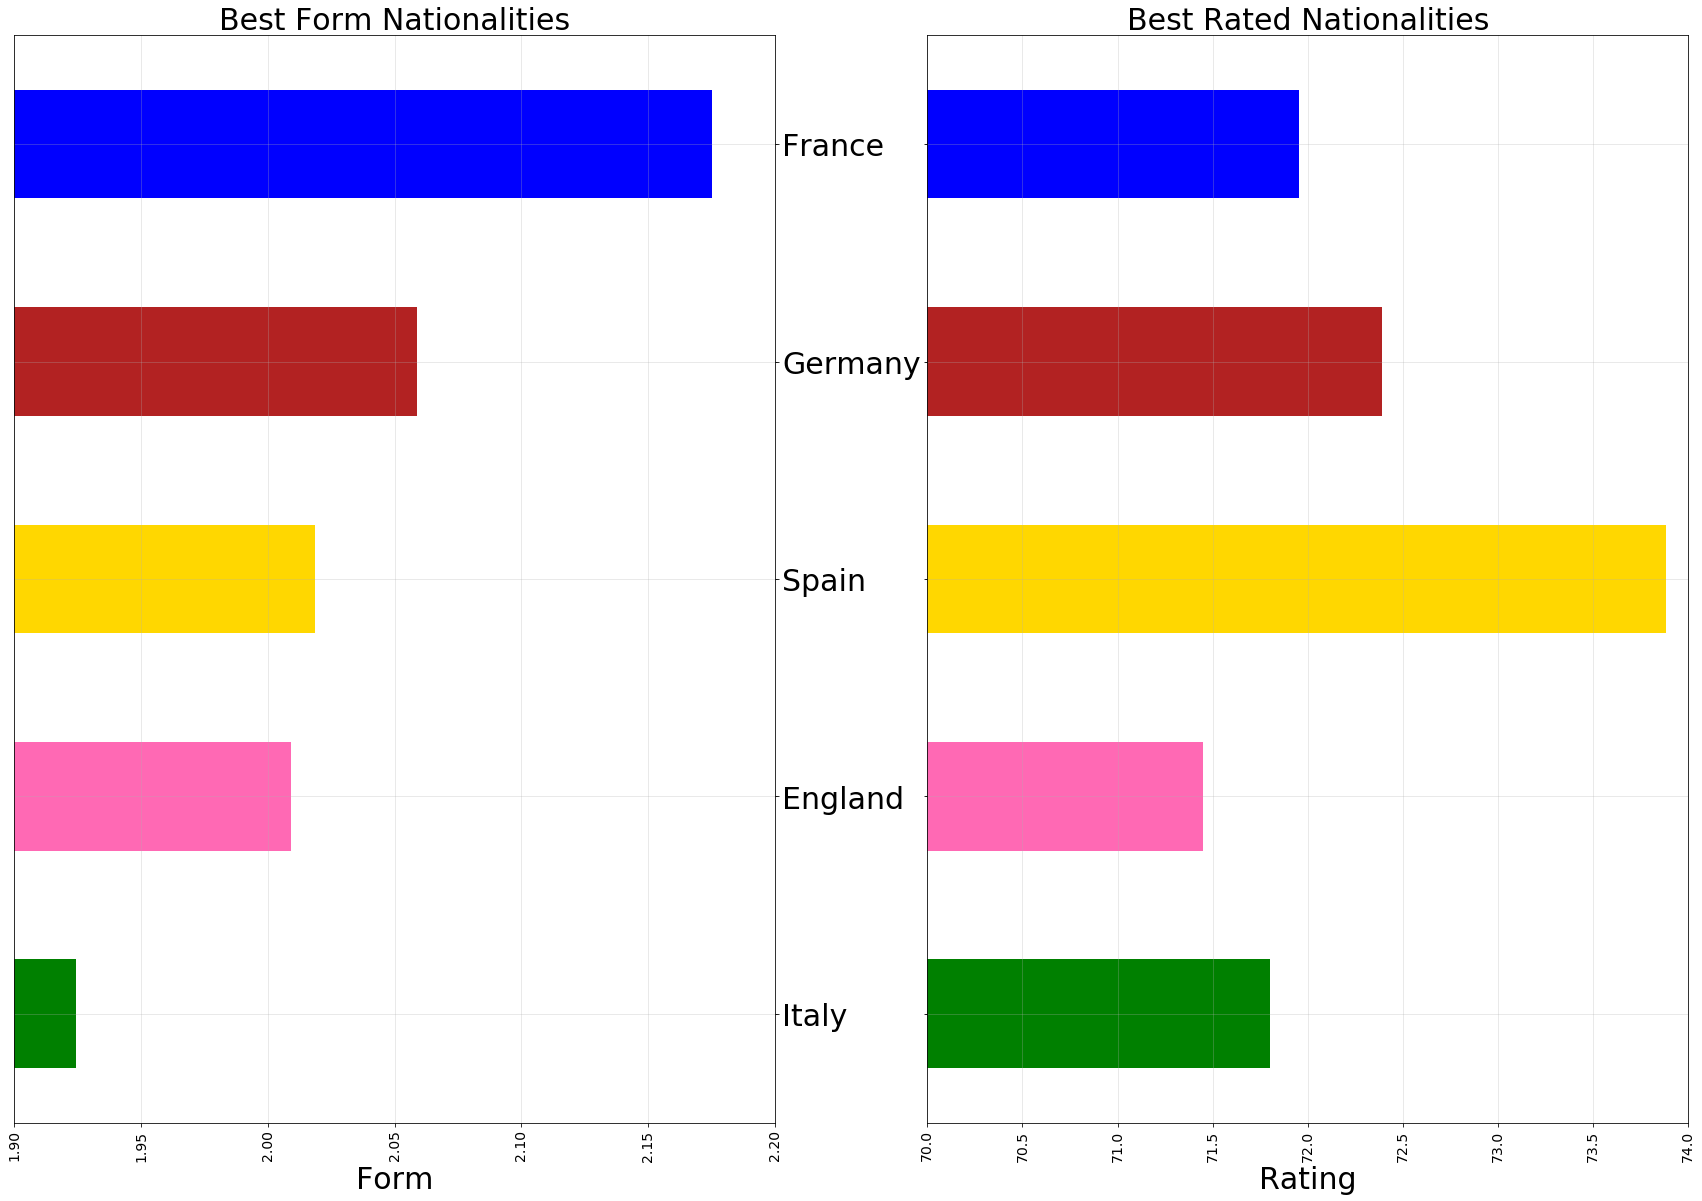

In [6]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30,20))

ax.yaxis.tick_right()

best_preforming.plot(legend=False, ax=ax,kind='barh',color=[['green','hotpink','gold','firebrick','blue']])
ax.set_xlim([1.9,2.20])
ax.set_title('Best Form Nationalities',size=30)
ax.set_xlabel('Form',size=30)
ax.set_ylabel('')
ax.grid(True,alpha=0.35)

best_rated.plot(ax=ax2,kind='barh',color=[['green','hotpink','gold','firebrick','blue']])
ax2 = plt.gca()
ax2.set_xlim([70,74])
ax2.grid(True,alpha=0.35)
ax2.set_title('Best Rated Nationalities',size=30)
ax2.set_xlabel('Rating',size=30)
ax2.set_ylabel('')
ax2.legend_.remove()


plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
plt.setp(ax2.get_xticklabels(), rotation='vertical', fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=30)
plt.show()

### Lets look at the Domestic Leagues

In [7]:
best_preforming_league = RQ2.loc[RQ2['league'].isin(['English Premier League','German Bundesliga','Spanish Primera Division','French Ligue 1','Italian Serie A'])]
best_preforming_league = best_preforming_league.groupby(['league']).mean()[['Average Form']].sort_values('Average Form', ascending=True)
best_preforming_league

,Average Form
league,
Italian Serie A,2.247652
French Ligue 1,2.304160
Spanish Primera Division,2.352524
German Bundesliga,2.398962
English Premier League,2.478522


In [8]:
best_rated_league = RQ2.loc[RQ2['league'].isin(['English Premier League','German Bundesliga','Spanish Primera Division','French Ligue 1','Italian Serie A'])]
best_rated_league = best_rated_league.groupby(['league']).mean()[['overall']]
best_rated_league = best_rated_league.reindex(['Italian Serie A','French Ligue 1','Spanish Primera Division','German Bundesliga','English Premier League'])
best_rated_league


,overall
league,
Italian Serie A,74.636816
French Ligue 1,72.950000
Spanish Primera Division,76.673846
German Bundesliga,75.070270
English Premier League,76.445221


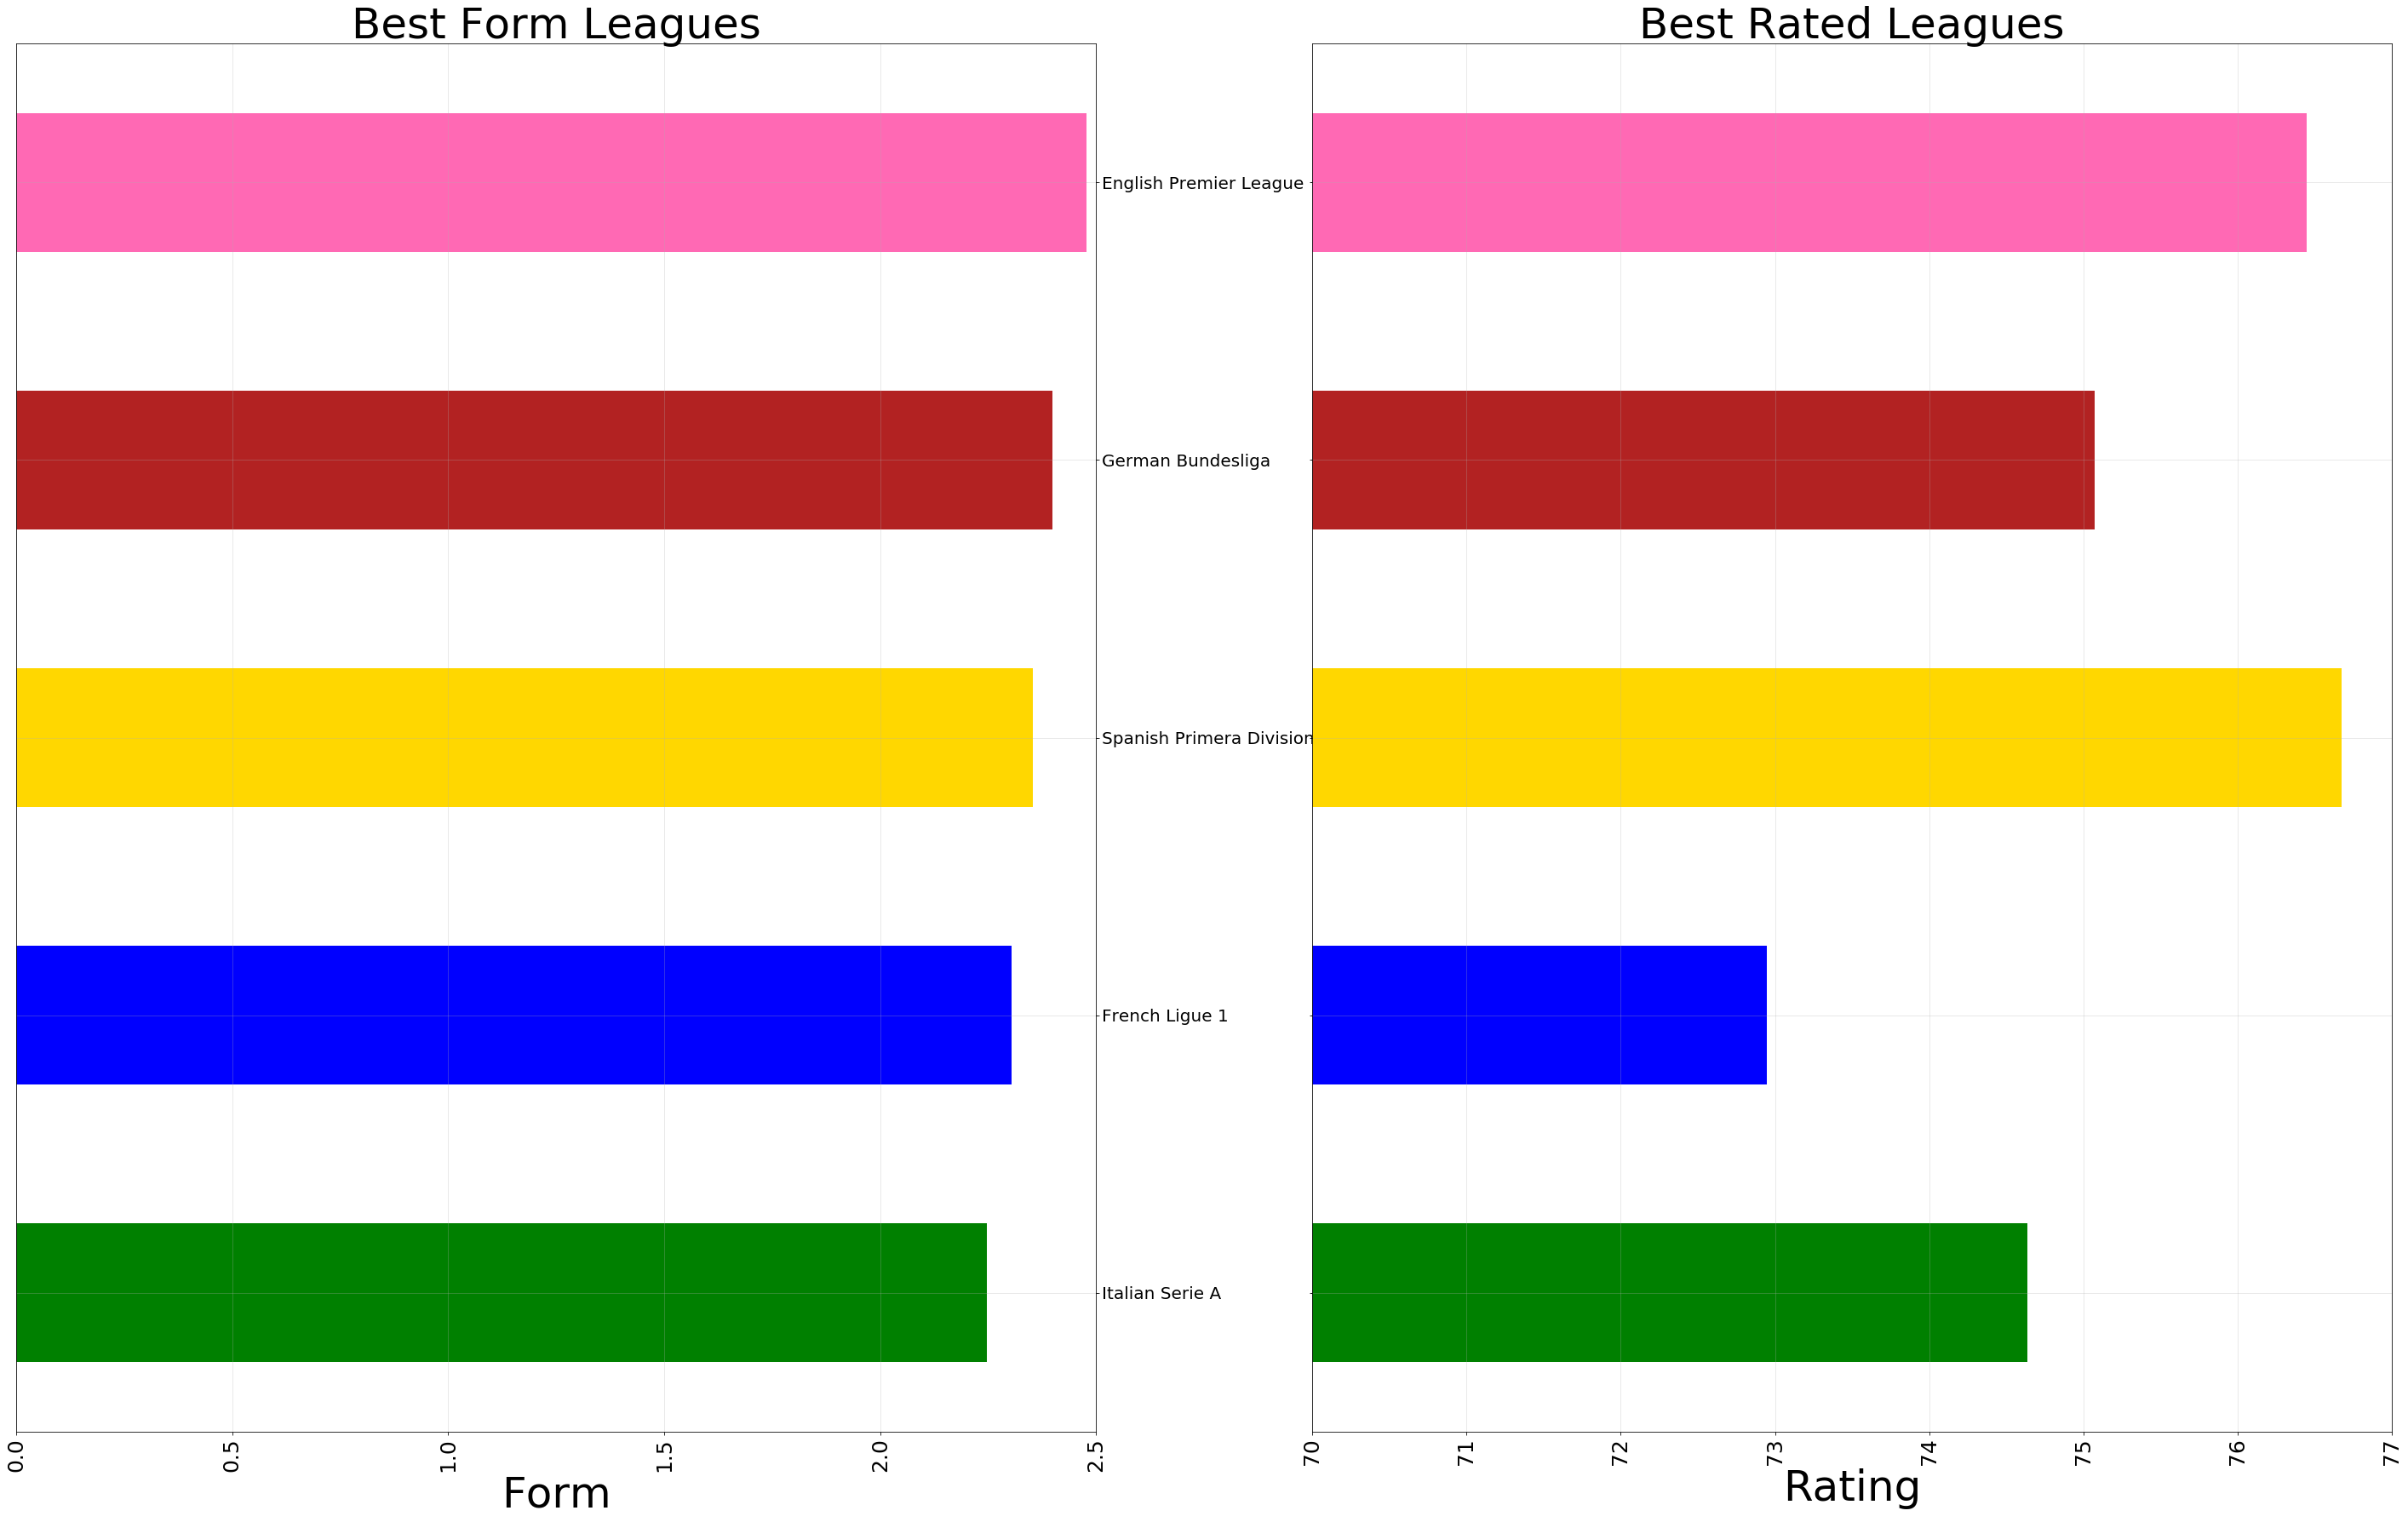

In [9]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(50,30))

ax.yaxis.tick_right()

best_preforming_league.plot(legend=False, ax=ax,kind='barh',color=[['green','blue','gold','firebrick','hotpink']])
ax.set_xlim([0,2.5])
ax.set_title('Best Form Leagues',size=50)
ax.set_xlabel('Form',size=50)
ax.set_ylabel('')
ax.grid(True,alpha=0.35)

best_rated_league.plot(ax=ax2,kind='barh',color=[['green','blue','gold','firebrick','hotpink']])
ax2 = plt.gca()
ax2.set_xlim([70,77])
ax2.grid(True,alpha=0.35)
ax2.set_title('Best Rated Leagues',size=50)
ax2.set_xlabel('Rating',size=50)
ax2.set_ylabel('')
ax2.legend_.remove()


plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=25)
plt.setp(ax2.get_xticklabels(), rotation='vertical', fontsize=25)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show()

### Player Count (What proportion of players are homegrown in each league)

In [10]:
EPL = RQ2.loc[RQ2.league=='English Premier League']
BUN = RQ2.loc[RQ2.league=='German Bundesliga']
LAL = RQ2.loc[RQ2.league=='Spanish Primera Division']
L1 = RQ2.loc[RQ2.league=='French Ligue 1']
SEI = RQ2.loc[RQ2.league=='Italian Serie A']

In [11]:
Homegrown_EPL = EPL.loc[EPL.Homegrown==True]
Foreign_EPL = EPL.loc[EPL.Homegrown==False]

Homegrown_BUN = BUN.loc[BUN.Homegrown==True]
Foreign_BUN = BUN.loc[BUN.Homegrown==False]

Homegrown_LAL = LAL.loc[LAL.Homegrown==True]
Foreign_LAL = LAL.loc[LAL.Homegrown==False]

Homegrown_L1 = L1.loc[L1.Homegrown==True]
Foreign_L1 = L1.loc[L1.Homegrown==False]

Homegrown_SEI = SEI.loc[SEI.Homegrown==True]
Foreign_SEI = SEI.loc[SEI.Homegrown==False]

In [12]:
HEPL = len(Homegrown_EPL)
HBUN = len(Homegrown_BUN)
HLAL = len(Homegrown_LAL)
FEPL = len(Foreign_EPL)
FBUN = len(Foreign_BUN)
FLAL = len(Foreign_LAL)
HL1 = len(Homegrown_L1)
HSEI = len(Homegrown_SEI)
FL1 = len(Foreign_L1)
FSEI = len(Foreign_SEI)


columns = ['Homegrown','Foreign']
count = pd.DataFrame(columns=columns)
count = count.fillna(0) # with 0s rather than NaNs
count['Homegrown']=HEPL,HBUN,HLAL,HL1,HSEI
count['Foreign']=FEPL,FBUN,FLAL,FL1,FSEI
count = count.transpose()
count.columns = ['EPL', 'BUN','LAL','L1','SEI']
count['Total'] = count.sum(axis=1)

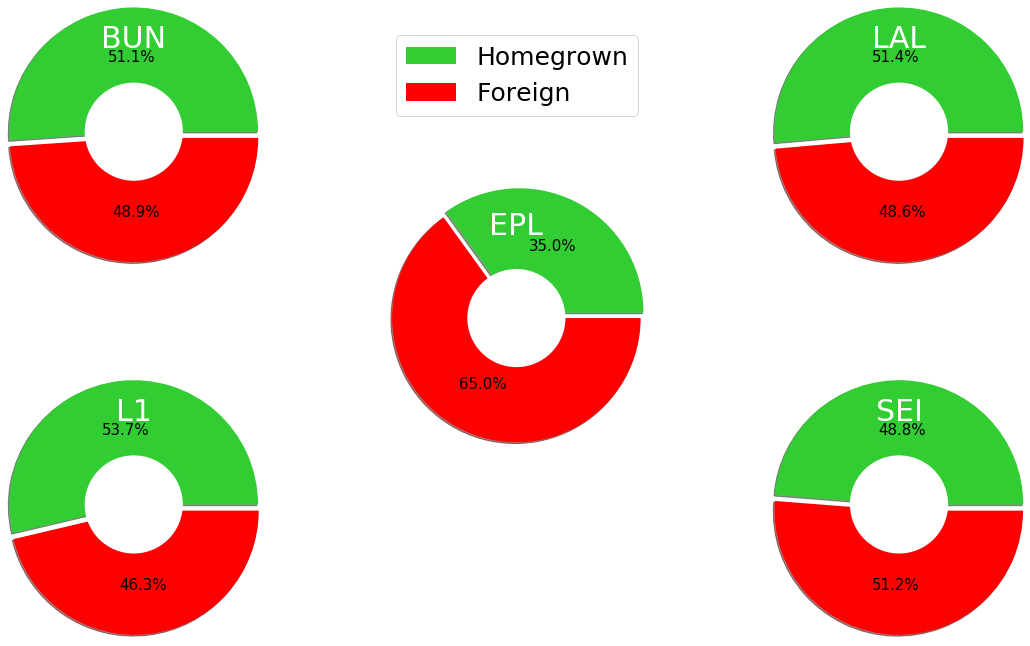

In [13]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

count.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count['EPL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('EPL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['BUN'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('BUN',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['LAL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('LAL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['L1'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('L1',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['SEI'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SEI',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.1, 3.5, 1., .102),prop={'size':25},labels=count.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.savefig('../../data/analysis/Homegrown vs Foreign Leagues.png')

### % of Homegrown Players Playing Abroad

In [14]:
ENG = RQ2.loc[RQ2.nationality=='England']
GER = RQ2.loc[RQ2.nationality=='Germany']
SPA = RQ2.loc[RQ2.nationality=='Spain']
FRA = RQ2.loc[RQ2.nationality=='France']
ITA = RQ2.loc[RQ2.nationality=='Italy']

In [15]:
Abroad_ENG = ENG.loc[ENG.Abroad==True]
Home_ENG = ENG.loc[ENG.Abroad==False]

Abroad_GER = GER.loc[GER.Abroad==True]
Home_GER = GER.loc[GER.Abroad==False]

Abroad_SPA = SPA.loc[SPA.Abroad==True]
Home_SPA = SPA.loc[SPA.Abroad==False]

Abroad_FRA = FRA.loc[FRA.Abroad==True]
Home_FRA = FRA.loc[FRA.Abroad==False]

Abroad_ITA = ITA.loc[ITA.Abroad==True]
Home_ITA = ITA.loc[ITA.Abroad==False]

In [16]:
AENG = len(Abroad_ENG)
AGER = len(Abroad_GER)
AFRA = len(Abroad_FRA)
HENG = len(Home_ENG)
HGER = len(Home_GER)
HFRA = len(Home_FRA)
ASPA = len(Abroad_SPA)
AITA = len(Abroad_ITA)
HSPA = len(Home_SPA)
HITA = len(Home_ITA)


columns = ['Abroad','Home']
count1 = pd.DataFrame(columns=columns)
count1 = count1.fillna(0) # with 0s rather than NaNs
count1['Abroad']=AENG,AGER,ASPA,AFRA,AITA
count1['Home']=HENG,HGER,HSPA,HFRA,HITA
count1 = count1.transpose()
count1.columns = ['ENG', 'GER','SPA','FRA','ITA']
count1['Total'] = count1.sum(axis=1)

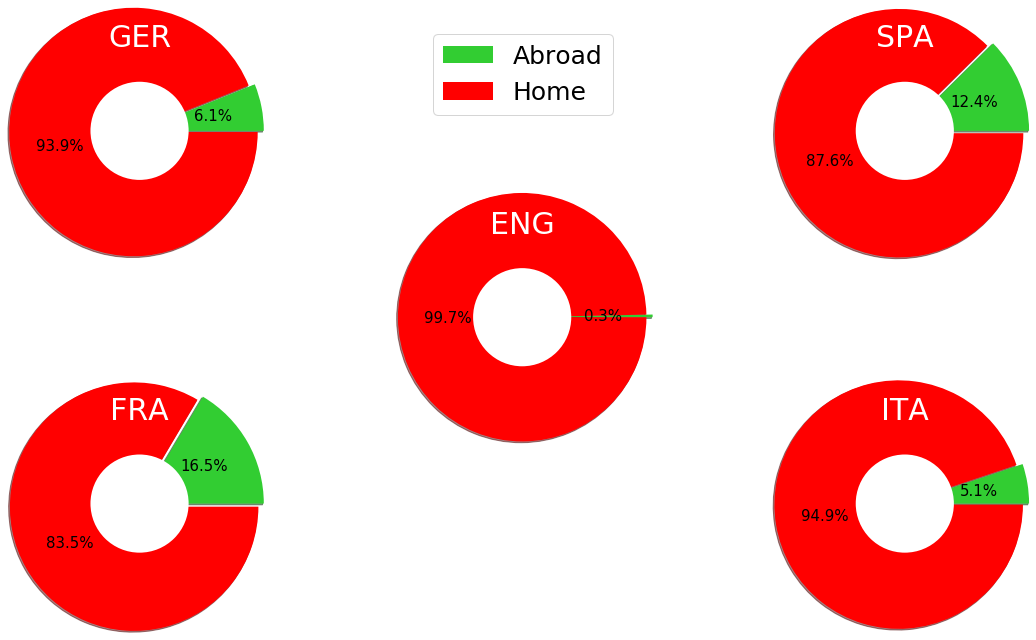

In [17]:
the_grid = GridSpec(6,6)

count1.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count1['ENG'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('ENG',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['GER'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('GER',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['SPA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SPA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['FRA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('FRA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['ITA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('ITA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.3, 3.5, 1., .102),prop={'size':25},labels=count1.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.savefig('../../data/analysis/Abroad vs Home Nations.png')

### Breakdown of Positions

In [18]:
EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Average Form'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Average Form'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','Average Form'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','Average Form'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Average Form'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Average Form'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Average Form'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Average Form'].mean()

EPL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_positions.set_value(0,'Position',"Goalkeeper")
EPL_positions.set_value(0,'Homegrown',EPL_H_GK)
EPL_positions.set_value(0,'Foreign',EPL_F_GK)
EPL_positions.set_value(1,'Position',"Defender")
EPL_positions.set_value(1,'Homegrown',EPL_H_DEF)
EPL_positions.set_value(1,'Foreign',EPL_F_DEF)
EPL_positions.set_value(2,'Position',"Midfielder")
EPL_positions.set_value(2,'Homegrown',EPL_H_MID)
EPL_positions.set_value(2,'Foreign',EPL_F_MID)
EPL_positions.set_value(3,'Position',"Forward")
EPL_positions.set_value(3,'Homegrown',EPL_H_FWD)
EPL_positions.set_value(3,'Foreign',EPL_F_FWD)

EPL_positions =EPL_positions.transpose()
EPL_positions.columns =EPL_positions.iloc[0]
EPL_positions =EPL_positions.drop(EPL_positions.index[0])
EPL_positions =EPL_positions.transpose()



EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','overall'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','overall'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','overall'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','overall'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','overall'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','overall'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','overall'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','overall'].mean()

EPL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_overall.set_value(0,'Position',"Goalkeeper")
EPL_overall.set_value(0,'Homegrown',EPL_H_GK)
EPL_overall.set_value(0,'Foreign',EPL_F_GK)
EPL_overall.set_value(1,'Position',"Defender")
EPL_overall.set_value(1,'Homegrown',EPL_H_DEF)
EPL_overall.set_value(1,'Foreign',EPL_F_DEF)
EPL_overall.set_value(2,'Position',"Midfielder")
EPL_overall.set_value(2,'Homegrown',EPL_H_MID)
EPL_overall.set_value(2,'Foreign',EPL_F_MID)
EPL_overall.set_value(3,'Position',"Forward")
EPL_overall.set_value(3,'Homegrown',EPL_H_FWD)
EPL_overall.set_value(3,'Foreign',EPL_F_FWD)

EPL_overall =EPL_overall.transpose()
EPL_overall.columns =EPL_overall.iloc[0]
EPL_overall =EPL_overall.drop(EPL_overall.index[0])
EPL_overall =EPL_overall.transpose()

In [19]:
LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Average Form'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Average Form'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','Average Form'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','Average Form'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Average Form'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Average Form'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Average Form'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Average Form'].mean()

LAL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_positions.set_value(0,'Position',"Goalkeeper")
LAL_positions.set_value(0,'Homegrown',LAL_H_GK)
LAL_positions.set_value(0,'Foreign',LAL_F_GK)
LAL_positions.set_value(1,'Position',"Defender")
LAL_positions.set_value(1,'Homegrown',LAL_H_DEF)
LAL_positions.set_value(1,'Foreign',LAL_F_DEF)
LAL_positions.set_value(2,'Position',"Midfielder")
LAL_positions.set_value(2,'Homegrown',LAL_H_MID)
LAL_positions.set_value(2,'Foreign',LAL_F_MID)
LAL_positions.set_value(3,'Position',"Forward")
LAL_positions.set_value(3,'Homegrown',LAL_H_FWD)
LAL_positions.set_value(3,'Foreign',LAL_F_FWD)

LAL_positions =LAL_positions.transpose()
LAL_positions.columns =LAL_positions.iloc[0]
LAL_positions =LAL_positions.drop(LAL_positions.index[0])
LAL_positions =LAL_positions.transpose()
LAL_positions



LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','overall'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','overall'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','overall'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','overall'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','overall'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','overall'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','overall'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','overall'].mean()

LAL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_overall.set_value(0,'Position',"Goalkeeper")
LAL_overall.set_value(0,'Homegrown',LAL_H_GK)
LAL_overall.set_value(0,'Foreign',LAL_F_GK)
LAL_overall.set_value(1,'Position',"Defender")
LAL_overall.set_value(1,'Homegrown',LAL_H_DEF)
LAL_overall.set_value(1,'Foreign',LAL_F_DEF)
LAL_overall.set_value(2,'Position',"Midfielder")
LAL_overall.set_value(2,'Homegrown',LAL_H_MID)
LAL_overall.set_value(2,'Foreign',LAL_F_MID)
LAL_overall.set_value(3,'Position',"Forward")
LAL_overall.set_value(3,'Homegrown',LAL_H_FWD)
LAL_overall.set_value(3,'Foreign',LAL_F_FWD)

LAL_overall =LAL_overall.transpose()
LAL_overall.columns =LAL_overall.iloc[0]
LAL_overall =LAL_overall.drop(LAL_overall.index[0])
LAL_overall =LAL_overall.transpose()

In [20]:
BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Average Form'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Average Form'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','Average Form'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','Average Form'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Average Form'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Average Form'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Average Form'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Average Form'].mean()

BUN_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_positions.set_value(0,'Position',"Goalkeeper")
BUN_positions.set_value(0,'Homegrown',BUN_H_GK)
BUN_positions.set_value(0,'Foreign',BUN_F_GK)
BUN_positions.set_value(1,'Position',"Defender")
BUN_positions.set_value(1,'Homegrown',BUN_H_DEF)
BUN_positions.set_value(1,'Foreign',BUN_F_DEF)
BUN_positions.set_value(2,'Position',"Midfielder")
BUN_positions.set_value(2,'Homegrown',BUN_H_MID)
BUN_positions.set_value(2,'Foreign',BUN_F_MID)
BUN_positions.set_value(3,'Position',"Forward")
BUN_positions.set_value(3,'Homegrown',BUN_H_FWD)
BUN_positions.set_value(3,'Foreign',BUN_F_FWD)


BUN_positions =BUN_positions.transpose()
BUN_positions.columns =BUN_positions.iloc[0]
BUN_positions =BUN_positions.drop(BUN_positions.index[0])
BUN_positions =BUN_positions.transpose()
BUN_positions


BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','overall'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','overall'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','overall'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','overall'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','overall'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','overall'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','overall'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','overall'].mean()

BUN_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_overall.set_value(0,'Position',"Goalkeeper")
BUN_overall.set_value(0,'Homegrown',BUN_H_GK)
BUN_overall.set_value(0,'Foreign',BUN_F_GK)
BUN_overall.set_value(1,'Position',"Defender")
BUN_overall.set_value(1,'Homegrown',BUN_H_DEF)
BUN_overall.set_value(1,'Foreign',BUN_F_DEF)
BUN_overall.set_value(2,'Position',"Midfielder")
BUN_overall.set_value(2,'Homegrown',BUN_H_MID)
BUN_overall.set_value(2,'Foreign',BUN_F_MID)
BUN_overall.set_value(3,'Position',"Forward")
BUN_overall.set_value(3,'Homegrown',BUN_H_FWD)
BUN_overall.set_value(3,'Foreign',BUN_F_FWD)

BUN_overall =BUN_overall.transpose()
BUN_overall.columns =BUN_overall.iloc[0]
BUN_overall =BUN_overall.drop(BUN_overall.index[0])
BUN_overall =BUN_overall.transpose()

In [21]:
L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Average Form'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Average Form'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','Average Form'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','Average Form'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Average Form'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Average Form'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Average Form'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Average Form'].mean()

L1_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_positions.set_value(0,'Position',"Goalkeeper")
L1_positions.set_value(0,'Homegrown',L1_H_GK)
L1_positions.set_value(0,'Foreign',L1_F_GK)
L1_positions.set_value(1,'Position',"Defender")
L1_positions.set_value(1,'Homegrown',L1_H_DEF)
L1_positions.set_value(1,'Foreign',L1_F_DEF)
L1_positions.set_value(2,'Position',"Midfielder")
L1_positions.set_value(2,'Homegrown',L1_H_MID)
L1_positions.set_value(2,'Foreign',L1_F_MID)
L1_positions.set_value(3,'Position',"Forward")
L1_positions.set_value(3,'Homegrown',L1_H_FWD)
L1_positions.set_value(3,'Foreign',L1_F_FWD)

L1_positions =L1_positions.transpose()
L1_positions.columns =L1_positions.iloc[0]
L1_positions =L1_positions.drop(L1_positions.index[0])
L1_positions =L1_positions.transpose()
L1_positions


L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','overall'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','overall'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','overall'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','overall'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','overall'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','overall'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','overall'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','overall'].mean()

L1_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_overall.set_value(0,'Position',"Goalkeeper")
L1_overall.set_value(0,'Homegrown',L1_H_GK)
L1_overall.set_value(0,'Foreign',L1_F_GK)
L1_overall.set_value(1,'Position',"Defender")
L1_overall.set_value(1,'Homegrown',L1_H_DEF)
L1_overall.set_value(1,'Foreign',L1_F_DEF)
L1_overall.set_value(2,'Position',"Midfielder")
L1_overall.set_value(2,'Homegrown',L1_H_MID)
L1_overall.set_value(2,'Foreign',L1_F_MID)
L1_overall.set_value(3,'Position',"Forward")
L1_overall.set_value(3,'Homegrown',L1_H_FWD)
L1_overall.set_value(3,'Foreign',L1_F_FWD)

L1_overall =L1_overall.transpose()
L1_overall.columns =L1_overall.iloc[0]
L1_overall =L1_overall.drop(L1_overall.index[0])
L1_overall =L1_overall.transpose()

In [22]:
ENG_abroad = RQ2.loc[(RQ2.nationality=='England') & (RQ2.league!='English Premier League')]
GER_abroad = RQ2.loc[(RQ2.nationality=='Germany') & (RQ2.league!='German Bundesliga')]
SPA_abroad = RQ2.loc[(RQ2.nationality=='Spain') & (RQ2.league!='Spanish Primera Division')]
FR_abroad = RQ2.loc[(RQ2.nationality=='France') & (RQ2.league!='French Ligue 1')]
ITA_abroad = RQ2.loc[(RQ2.nationality=='Italy') & (RQ2.league!='Italian Serie A')]

In [23]:
SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Average Form'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Average Form'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','Average Form'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','Average Form'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Average Form'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Average Form'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Average Form'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Average Form'].mean()

SEI_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_positions.set_value(0,'Position',"Goalkeeper")
SEI_positions.set_value(0,'Homegrown',SEI_H_GK)
SEI_positions.set_value(0,'Foreign',SEI_F_GK)
SEI_positions.set_value(1,'Position',"Defender")
SEI_positions.set_value(1,'Homegrown',SEI_H_DEF)
SEI_positions.set_value(1,'Foreign',SEI_F_DEF)
SEI_positions.set_value(2,'Position',"Midfielder")
SEI_positions.set_value(2,'Homegrown',SEI_H_MID)
SEI_positions.set_value(2,'Foreign',SEI_F_MID)
SEI_positions.set_value(3,'Position',"Forward")
SEI_positions.set_value(3,'Homegrown',SEI_H_FWD)
SEI_positions.set_value(3,'Foreign',SEI_F_FWD)

SEI_positions =SEI_positions.transpose()
SEI_positions.columns =SEI_positions.iloc[0]
SEI_positions =SEI_positions.drop(SEI_positions.index[0])
SEI_positions =SEI_positions.transpose()



SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','overall'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','overall'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','overall'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','overall'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','overall'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','overall'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','overall'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','overall'].mean()

SEI_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_overall.set_value(0,'Position',"Goalkeeper")
SEI_overall.set_value(0,'Homegrown',SEI_H_GK)
SEI_overall.set_value(0,'Foreign',SEI_F_GK)
SEI_overall.set_value(1,'Position',"Defender")
SEI_overall.set_value(1,'Homegrown',SEI_H_DEF)
SEI_overall.set_value(1,'Foreign',SEI_F_DEF)
SEI_overall.set_value(2,'Position',"Midfielder")
SEI_overall.set_value(2,'Homegrown',SEI_H_MID)
SEI_overall.set_value(2,'Foreign',SEI_F_MID)
SEI_overall.set_value(3,'Position',"Forward")
SEI_overall.set_value(3,'Homegrown',SEI_H_FWD)
SEI_overall.set_value(3,'Foreign',SEI_F_FWD)

SEI_overall =SEI_overall.transpose()
SEI_overall.columns =SEI_overall.iloc[0]
SEI_overall =SEI_overall.drop(SEI_overall.index[0])
SEI_overall =SEI_overall.transpose()

In [24]:
EPL_positions

,Homegrown,Foreign
Position,,
Goalkeeper,2.41836,2.50348
Defender,2.28067,2.40502
Midfielder,2.11424,2.38824
Forward,2.90056,3.12641


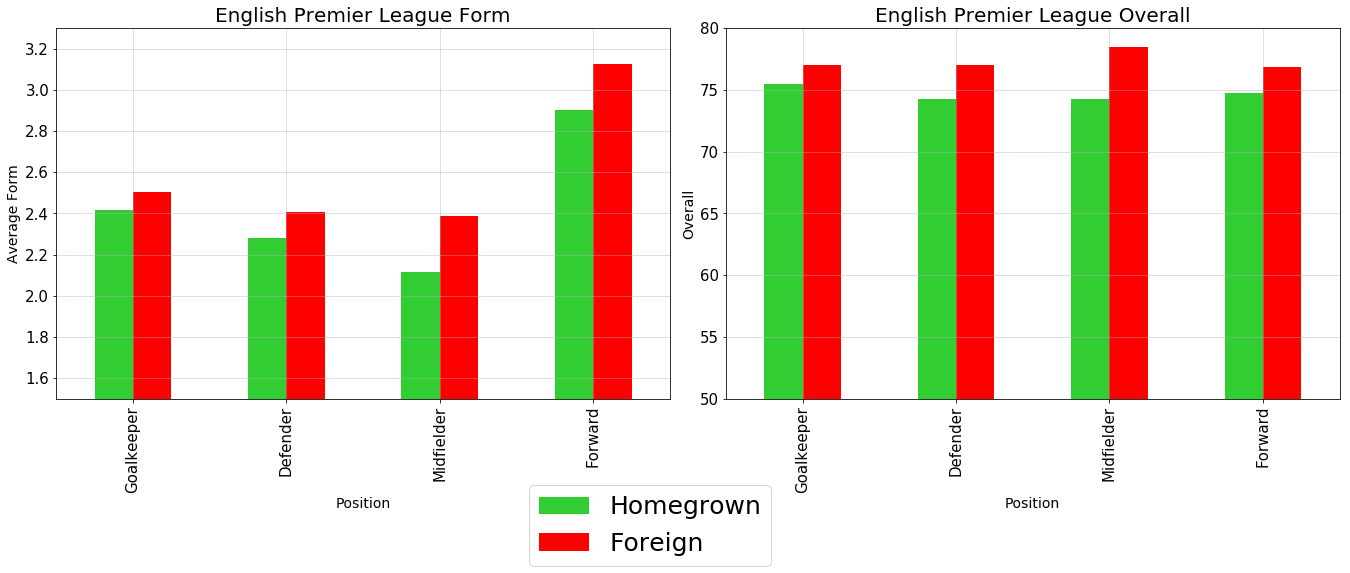

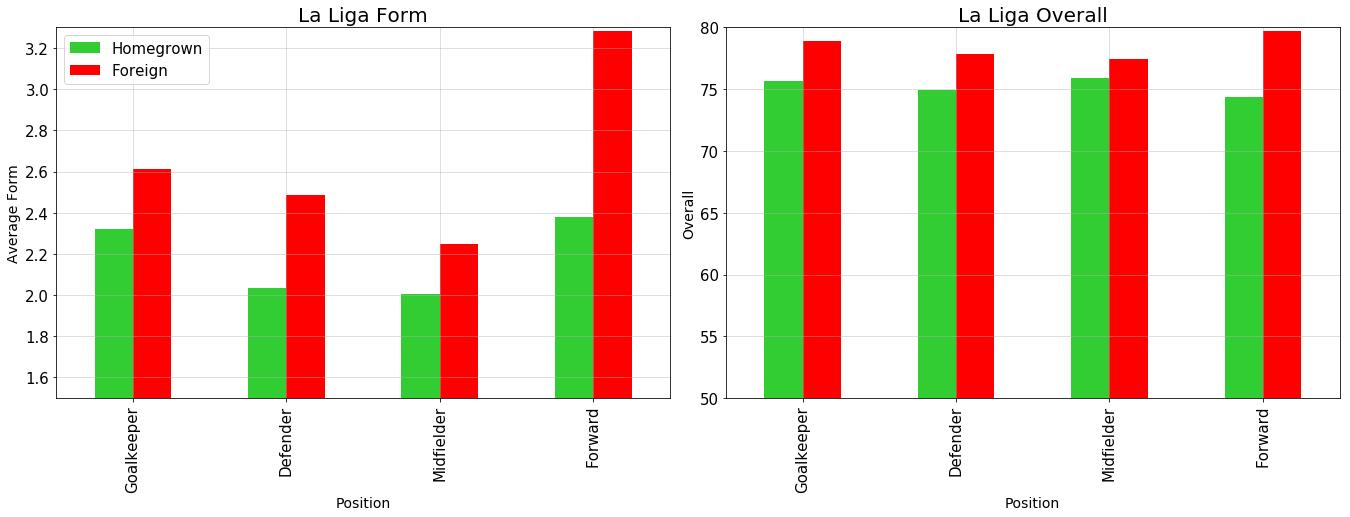

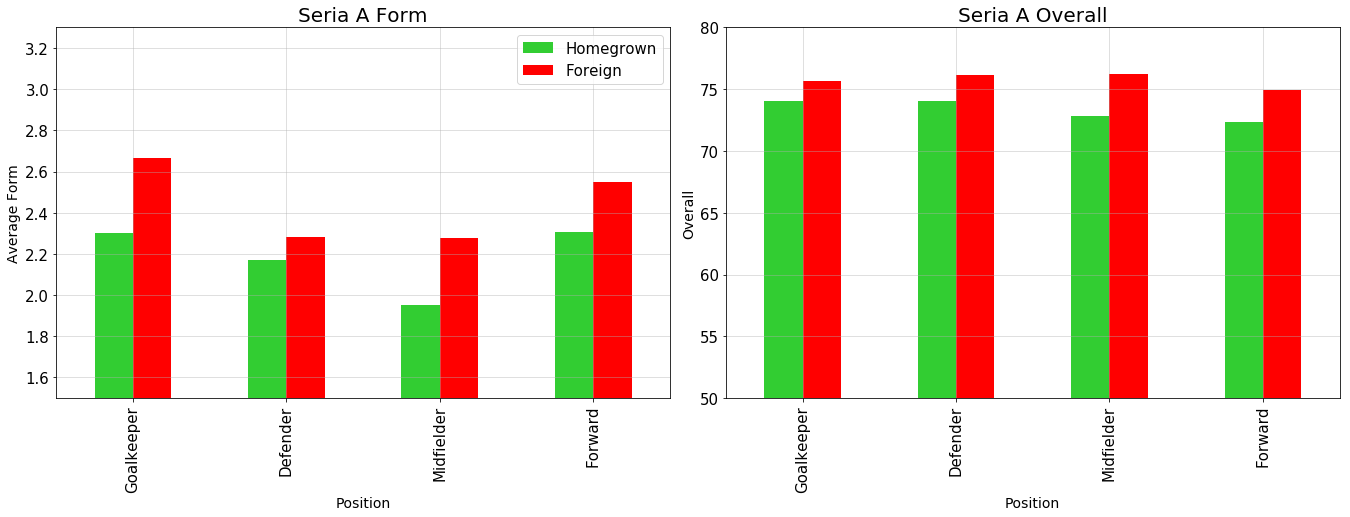

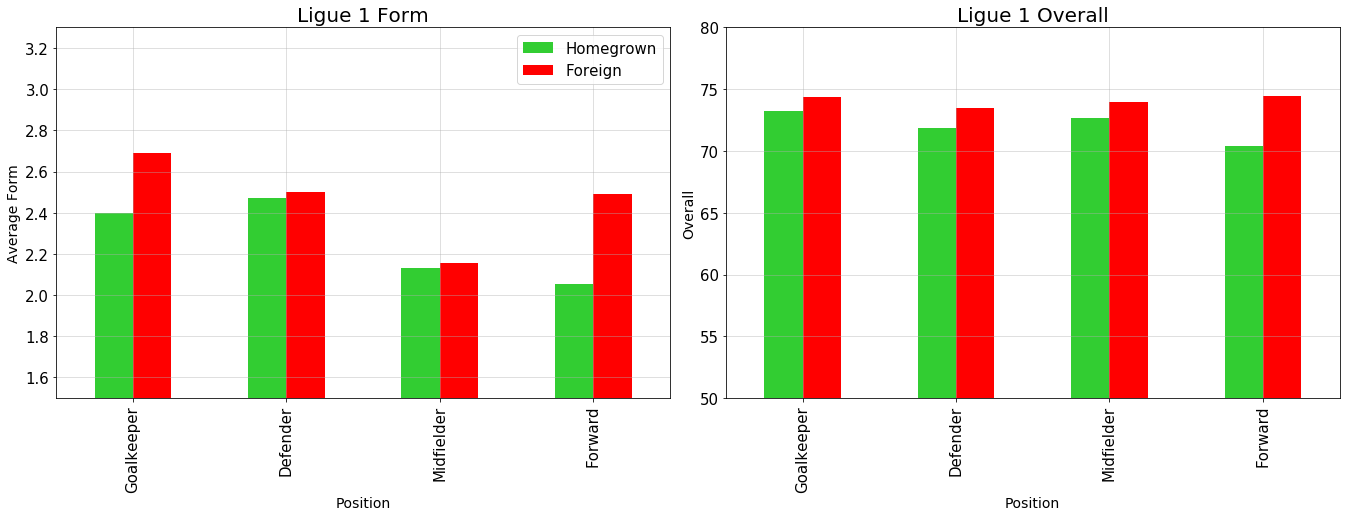

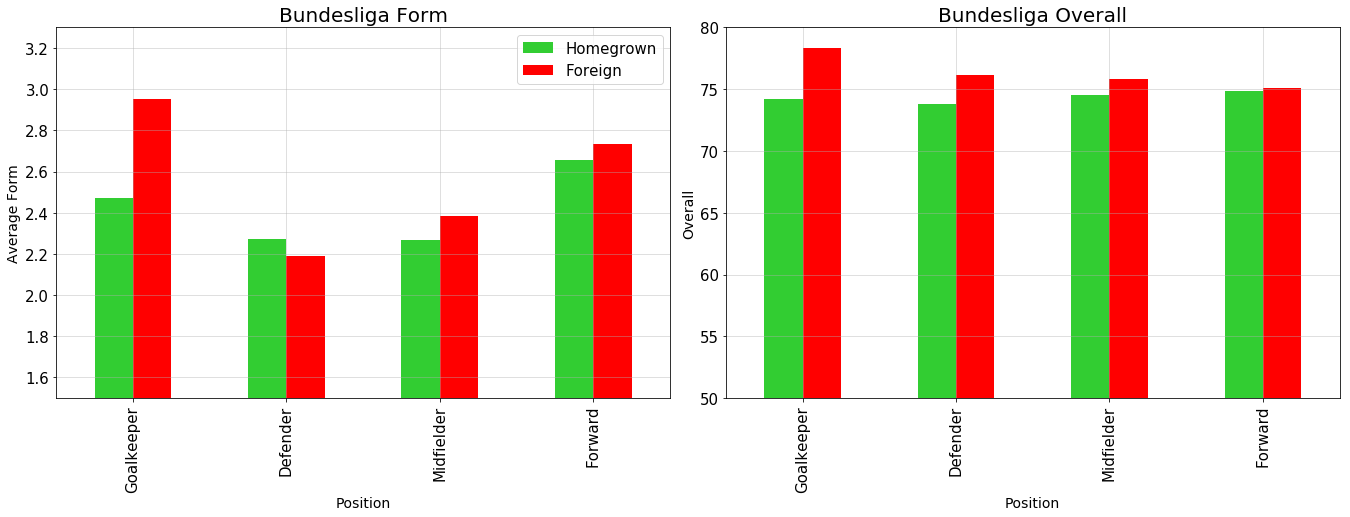

In [25]:
axis_size=14
color = ['limegreen','r']

fig = plt.figure(figsize=(35,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('English Premier League Form',size=20)
EPL_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.legend(bbox_to_anchor=(.75, -.2, 0, 0),prop={'size':25},labels=['Homegrown','Foreign'])
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('English Premier League Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
EPL_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F1.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('La Liga Form',size=20)
LAL_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('La Liga Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
LAL_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F2.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Seria A Form',size=20)
SEI_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Seria A Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
ax1.set_ylim([50,80])
SEI_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F3.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Ligue 1 Form',size=20)
L1_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('Ligue 1 Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
L1_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F5.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Bundesliga Form',size=20)
BUN_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Bundesliga Overall',size=20)
ax1.set_ylim([50,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
BUN_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
plt.show()

fig.savefig('../../data/analysis/League H_F6.png')

### Whos more likely to Start?

In [26]:
EPLH_starts = Homegrown_EPL['Starts/Apps'].mean()
EPLF_starts = Foreign_EPL['Starts/Apps'].mean()

LALH_starts = Homegrown_LAL['Starts/Apps'].mean()
LALF_starts = Foreign_LAL['Starts/Apps'].mean()

BUNH_starts = Homegrown_BUN['Starts/Apps'].mean()
BUNF_starts = Foreign_BUN['Starts/Apps'].mean()

L1H_starts = Homegrown_L1['Starts/Apps'].mean()
L1F_starts = Foreign_L1['Starts/Apps'].mean()

SEIH_starts = Homegrown_SEI['Starts/Apps'].mean()
SEIF_starts = Foreign_SEI['Starts/Apps'].mean()

starts = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
starts.set_value(0,'League',"EPL")
starts.set_value(0,'Homegrown',EPLH_starts)
starts.set_value(0,'Foreign',EPLF_starts)
starts.set_value(1,'League',"LAL")
starts.set_value(1,'Homegrown',LALH_starts )
starts.set_value(1,'Foreign',LALF_starts)
starts.set_value(2,'League',"BUN")
starts.set_value(2,'Homegrown',BUNH_starts)
starts.set_value(2,'Foreign',BUNF_starts)
starts.set_value(3,'League',"L1")
starts.set_value(3,'Homegrown',L1H_starts)
starts.set_value(3,'Foreign',L1F_starts)
starts.set_value(4,'League',"SEI")
starts.set_value(4,'Homegrown',SEIH_starts)
starts.set_value(4,'Foreign',SEIF_starts)
starts

,League,Homegrown,Foreign
0,EPL,0.711031,0.788975
1,LAL,0.715971,0.766175
2,BUN,0.735374,0.737333
3,L1,0.699078,0.725429
4,SEI,0.695266,0.751528


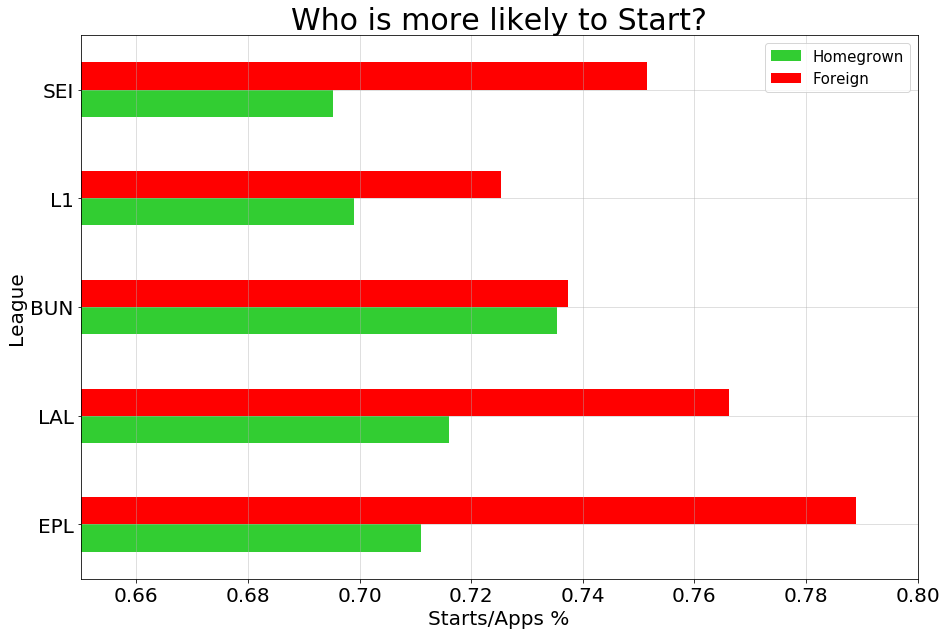

In [27]:
ax = starts[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Starts/Apps %", fontsize=20)
ax.set_title("Who is more likely to Start?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.65,0.8)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to Start?.png')

### Who's More Likely to be Subbed off 

In [28]:
EPLH_subbed = Homegrown_EPL['Subbed Off/Apps'].mean()
EPLF_subbed = Foreign_EPL['Subbed Off/Apps'].mean()
EPL_subbed = pd.DataFrame([EPLH_subbed,EPLF_subbed])

LALH_subbed = Homegrown_LAL['Subbed Off/Apps'].mean()
LALF_subbed = Foreign_LAL['Subbed Off/Apps'].mean()
LAL_subbed = pd.DataFrame([LALH_subbed,LALF_subbed])

BUNH_subbed = Homegrown_BUN['Subbed Off/Apps'].mean()
BUNF_subbed = Foreign_BUN['Subbed Off/Apps'].mean()
BUN_subbed = pd.DataFrame([BUNH_subbed,BUNF_subbed])

L1H_subbed = Homegrown_L1['Subbed Off/Apps'].mean()
L1F_subbed = Foreign_L1['Subbed Off/Apps'].mean()
L1_subbed = pd.DataFrame([L1H_subbed,L1F_subbed])

SEIH_subbed = Homegrown_SEI['Subbed Off/Apps'].mean()
SEIF_subbed = Foreign_SEI['Subbed Off/Apps'].mean()
SEI_subbed = pd.DataFrame([SEIH_subbed,SEIF_subbed])

subbed = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
subbed.set_value(0,'League',"EPL")
subbed.set_value(0,'Homegrown',EPLH_subbed)
subbed.set_value(0,'Foreign',EPLF_subbed)
subbed.set_value(1,'League',"LAL")
subbed.set_value(1,'Homegrown',LALH_subbed )
subbed.set_value(1,'Foreign',LALF_subbed)
subbed.set_value(2,'League',"BUN")
subbed.set_value(2,'Homegrown',BUNH_subbed)
subbed.set_value(2,'Foreign',BUNF_subbed)
subbed.set_value(3,'League',"L1")
subbed.set_value(3,'Homegrown',L1H_subbed)
subbed.set_value(3,'Foreign',L1F_subbed)
subbed.set_value(4,'League',"SEI")
subbed.set_value(4,'Homegrown',SEIH_subbed)
subbed.set_value(4,'Foreign',SEIF_subbed)

,League,Homegrown,Foreign
0,EPL,0.1685,0.182508
1,LAL,0.184304,0.22032
2,BUN,0.180851,0.213323
3,L1,0.186398,0.174236
4,SEI,0.172065,0.213468


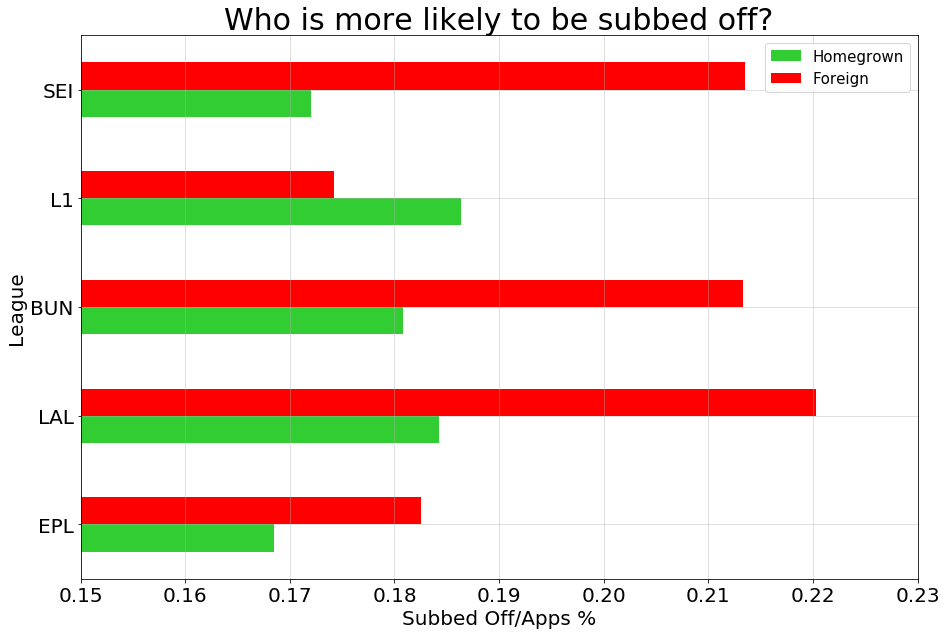

In [29]:
ax = subbed[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Subbed Off/Apps %", fontsize=20)
ax.set_title("Who is more likely to be subbed off?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.15,0.23)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to be subbed off?.png')

### Whos more likely to score all of the goals?

In [30]:
EPLH_goals = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Goals/Apps'].mean()
EPLF_goals = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Goals/Apps'].mean()

BUNH_goals = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Goals/Apps'].mean()
BUNF_goals = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Goals/Apps'].mean()

LALH_goals = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Goals/Apps'].mean()
LALF_goals = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Goals/Apps'].mean()

L1H_goals = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Goals/Apps'].mean()
L1F_goals = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Goals/Apps'].mean()

SEIH_goals = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Goals/Apps'].mean()
SEIF_goals = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Goals/Apps'].mean()

goals = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
goals.set_value(0,'League',"EPL")
goals.set_value(0,'Homegrown',EPLH_goals)
goals.set_value(0,'Foreign',EPLF_goals)
goals.set_value(1,'League',"LAL")
goals.set_value(1,'Homegrown',LALH_goals )
goals.set_value(1,'Foreign',LALF_goals)
goals.set_value(2,'League',"BUN")
goals.set_value(2,'Homegrown',BUNH_goals)
goals.set_value(2,'Foreign',BUNF_goals)
goals.set_value(3,'League',"L1")
goals.set_value(3,'Homegrown',L1H_goals)
goals.set_value(3,'Foreign',L1F_goals)
goals.set_value(4,'League',"SEI")
goals.set_value(4,'Homegrown',SEIH_goals)
goals.set_value(4,'Foreign',SEIF_goals)

,League,Homegrown,Foreign
0,EPL,0.240909,0.265736
1,LAL,0.154038,0.282512
2,BUN,0.181261,0.207093
3,L1,0.105024,0.176152
4,SEI,0.159793,0.18205


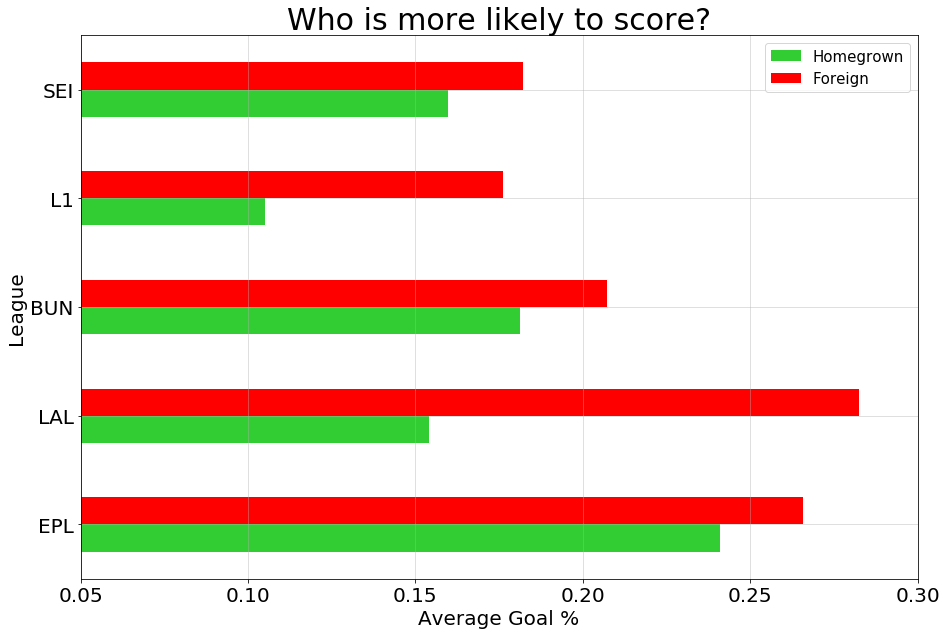

In [31]:
ax = goals[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Average Goal %", fontsize=20)
ax.set_title("Who is more likely to score?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.05,0.3)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to score?.png')

### Whos more likely to assist all of the goals?

In [32]:
EPLH_assists = Homegrown_EPL['Assists/Apps'].mean()
EPLF_assists = Foreign_EPL['Assists/Apps'].mean()
EPL_assists = pd.DataFrame([EPLH_assists,EPLF_assists])

LALH_assists = Homegrown_LAL['Assists/Apps'].mean()
LALF_assists = Foreign_LAL['Assists/Apps'].mean()
LAL_assists = pd.DataFrame([LALH_assists,LALF_assists])

BUNH_assists = Homegrown_BUN['Assists/Apps'].mean()
BUNF_assists = Foreign_BUN['Assists/Apps'].mean()
BUN_assists = pd.DataFrame([BUNH_assists,BUNF_assists])

L1H_assists = Homegrown_L1['Assists/Apps'].mean()
L1F_assists = Foreign_L1['Assists/Apps'].mean()
L1_assists = pd.DataFrame([L1H_assists,L1F_assists])

SEIH_assists = Homegrown_SEI['Assists/Apps'].mean()
SEIF_assists = Foreign_SEI['Assists/Apps'].mean()
SEI_assists = pd.DataFrame([SEIH_assists,SEIF_assists])

assists = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
assists.set_value(0,'League',"EPL")
assists.set_value(0,'Homegrown',EPLH_assists)
assists.set_value(0,'Foreign',EPLF_assists)
assists.set_value(1,'League',"LAL")
assists.set_value(1,'Homegrown',LALH_assists )
assists.set_value(1,'Foreign',LALF_assists)
assists.set_value(2,'League',"BUN")
assists.set_value(2,'Homegrown',BUNH_assists)
assists.set_value(2,'Foreign',BUNF_assists)
assists.set_value(3,'League',"L1")
assists.set_value(3,'Homegrown',L1H_assists)
assists.set_value(3,'Foreign',L1F_assists)
assists.set_value(4,'League',"SEI")
assists.set_value(4,'Homegrown',SEIH_assists)
assists.set_value(4,'Foreign',SEIF_assists)

,League,Homegrown,Foreign
0,EPL,0.05772,0.0668879
1,LAL,0.057233,0.0731645
2,BUN,0.0704317,0.0684561
3,L1,0.0556003,0.0548276
4,SEI,0.0444984,0.0704075


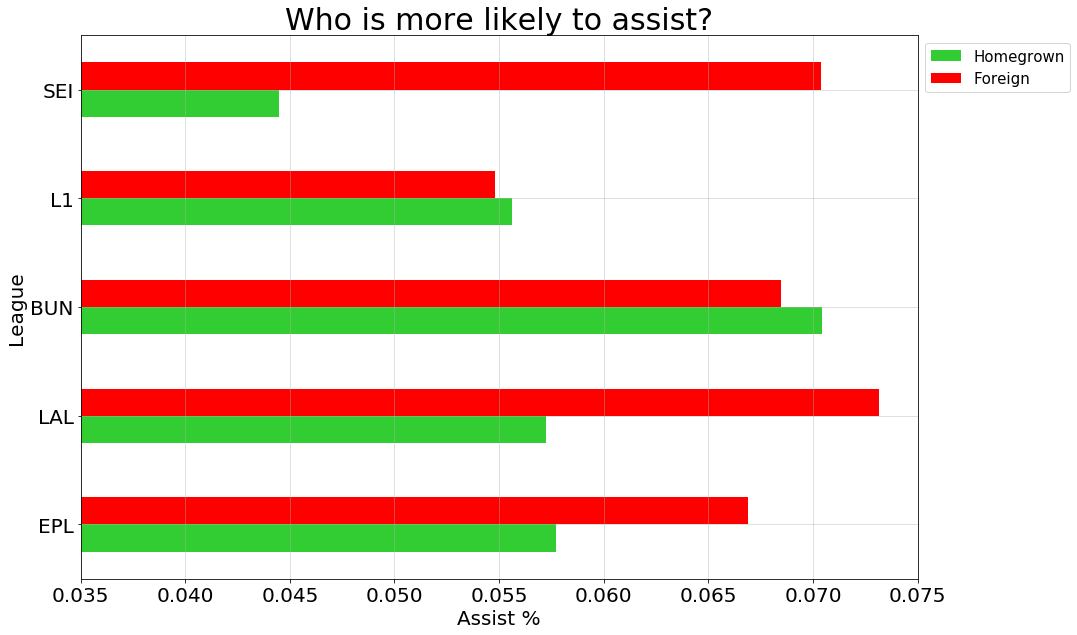

In [33]:
ax = assists[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Assist %", fontsize=20)
ax.set_title("Who is more likely to assist?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.035,0.075)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to assist?.png')

### Whos more likely to get a clean sheet (Goalkeepers)

In [34]:
EPLH_gkcleansheets = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPLF_gkcleansheets = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPL_gkcleansheets = pd.DataFrame([EPLH_gkcleansheets,EPLF_gkcleansheets])

BUNH_gkcleansheets = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUNF_gkcleansheets = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUN_gkcleansheets = pd.DataFrame([BUNH_gkcleansheets,BUNF_gkcleansheets])

LALH_gkcleansheets = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LALF_gkcleansheets = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LAL_gkcleansheets = pd.DataFrame([LALH_gkcleansheets,LALF_gkcleansheets])

L1H_gkcleansheets = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1F_gkcleansheets = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1_gkcleansheets = pd.DataFrame([L1H_gkcleansheets,L1F_gkcleansheets])

SEIH_gkcleansheets = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEIF_gkcleansheets = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEI_gkcleansheets = pd.DataFrame([SEIH_gkcleansheets,SEIF_gkcleansheets])

gkcleansheets = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
gkcleansheets.set_value(0,'League',"EPL")
gkcleansheets.set_value(0,'Homegrown',EPLH_gkcleansheets)
gkcleansheets.set_value(0,'Foreign',EPLF_gkcleansheets)
gkcleansheets.set_value(1,'League',"LAL")
gkcleansheets.set_value(1,'Homegrown',LALH_gkcleansheets )
gkcleansheets.set_value(1,'Foreign',LALF_gkcleansheets)
gkcleansheets.set_value(2,'League',"BUN")
gkcleansheets.set_value(2,'Homegrown',BUNH_gkcleansheets)
gkcleansheets.set_value(2,'Foreign',BUNF_gkcleansheets)
gkcleansheets.set_value(3,'League',"L1")
gkcleansheets.set_value(3,'Homegrown',L1H_gkcleansheets)
gkcleansheets.set_value(3,'Foreign',L1F_gkcleansheets)
gkcleansheets.set_value(4,'League',"SEI")
gkcleansheets.set_value(4,'Homegrown',SEIH_gkcleansheets)
gkcleansheets.set_value(4,'Foreign',SEIF_gkcleansheets)

,League,Homegrown,Foreign
0,EPL,0.257793,0.276225
1,LAL,0.280871,0.306518
2,BUN,0.28933,0.368711
3,L1,0.279229,0.231765
4,SEI,0.239935,0.284952


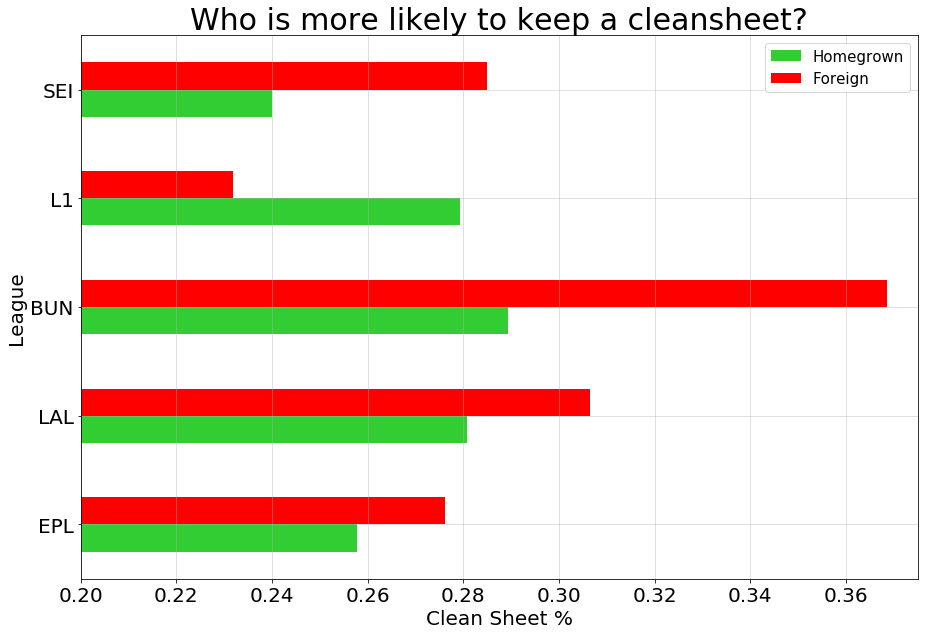

In [35]:
ax = gkcleansheets[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Clean Sheet %", fontsize=20)
ax.set_title("Who is more likely to keep a cleansheet?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.2,0.375)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to keep a cleansheet?.png')

## So who preforms the best vs Who is better rated?

In [36]:
EPLH_form = Homegrown_EPL['Average Form'].mean()
EPLF_form = Foreign_EPL['Average Form'].mean()
EPL_form = pd.DataFrame([EPLH_form,EPLF_form])

LALH_form = Homegrown_LAL['Average Form'].mean()
LALF_form = Foreign_LAL['Average Form'].mean()
LAL_form = pd.DataFrame([LALH_form,LALF_form])

BUNH_form = Homegrown_BUN['Average Form'].mean()
BUNF_form = Foreign_BUN['Average Form'].mean()
BUN_form = pd.DataFrame([BUNH_form,BUNF_form])

L1H_form = Homegrown_L1['Average Form'].mean()
L1F_form = Foreign_L1['Average Form'].mean()
L1_form = pd.DataFrame([L1H_form,L1F_form])

SEIH_form = Homegrown_SEI['Average Form'].mean()
SEIF_form = Foreign_SEI['Average Form'].mean()
SEI_form = pd.DataFrame([SEIH_form,SEIF_form])


form = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
form.set_value(0,'League',"EPL")
form.set_value(0,'Homegrown',EPLH_form)
form.set_value(0,'Foreign',EPLF_form)
form.set_value(1,'League',"LAL")
form.set_value(1,'Homegrown',LALH_form )
form.set_value(1,'Foreign',LALF_form)
form.set_value(2,'League',"BUN")
form.set_value(2,'Homegrown',BUNH_form)
form.set_value(2,'Foreign',BUNF_form)
form.set_value(3,'League',"L1")
form.set_value(3,'Homegrown',L1H_form)
form.set_value(3,'Foreign',L1F_form)
form.set_value(4,'League',"SEI")
form.set_value(4,'Homegrown',SEIH_form)
form.set_value(4,'Foreign',SEIF_form)

,League,Homegrown,Foreign
0,EPL,2.34213,2.55185
1,LAL,2.13044,2.58726
2,BUN,2.35381,2.44611
3,L1,2.22368,2.39744
4,SEI,2.14425,2.34604


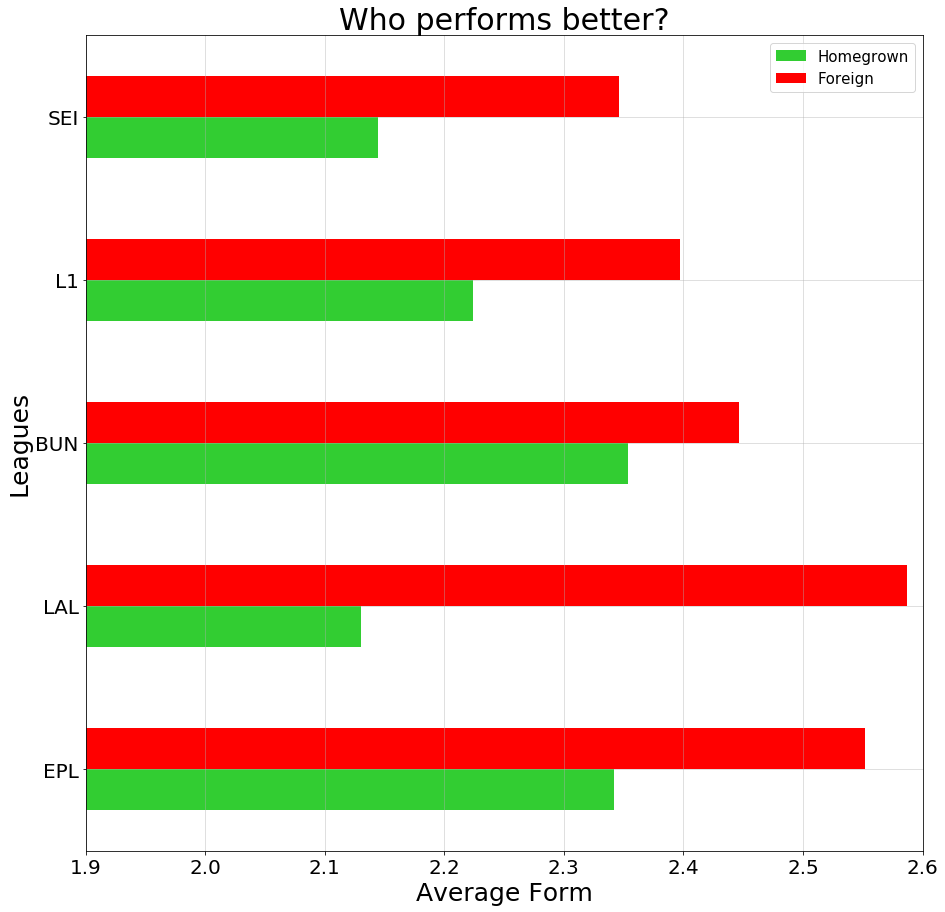

In [37]:
ax = form[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("Leagues", fontsize=25)
ax.set_xlabel("Average Form", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlim(1.9,2.6)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()
plt.savefig('../../data/analysis/League Form.png')

In [38]:
EPLH_overall = Homegrown_EPL['overall'].mean()
EPLA_overall = Foreign_EPL['overall'].mean()
EPL_overall = pd.DataFrame([EPLH_overall,EPLA_overall])

LALH_overall = Homegrown_LAL['overall'].mean()
LALF_overall = Foreign_LAL['overall'].mean()
LAL_overall = pd.DataFrame([LALH_overall,LALF_overall])

BUNH_overall = Homegrown_BUN['overall'].mean()
BUNF_overall = Foreign_BUN['overall'].mean()
BUN_overall = pd.DataFrame([BUNH_overall,BUNF_overall])

L1H_overall = Homegrown_L1['overall'].mean()
L1F_overall = Foreign_L1['overall'].mean()
L1_overall = pd.DataFrame([L1H_overall,L1F_overall])

SEIH_overall = Homegrown_SEI['overall'].mean()
SEIF_overall = Foreign_SEI['overall'].mean()
SEI_overall = pd.DataFrame([SEIH_overall,SEIF_overall])

overall = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Homegrown',EPLH_overall)
overall.set_value(0,'Foreign',EPLA_overall)
overall.set_value(1,'League',"LAL")
overall.set_value(1,'Homegrown',LALH_overall )
overall.set_value(1,'Foreign',LALF_overall)
overall.set_value(2,'League',"BUN")
overall.set_value(2,'Homegrown',BUNH_overall)
overall.set_value(2,'Foreign',BUNF_overall)
overall.set_value(3,'League',"L1")
overall.set_value(3,'Homegrown',L1H_overall)
overall.set_value(3,'Foreign',L1F_overall)
overall.set_value(4,'League',"SEI")
overall.set_value(4,'Homegrown',SEIH_overall)
overall.set_value(4,'Foreign',SEIF_overall)

,League,Homegrown,Foreign
0,EPL,74.4333,77.5269
1,LAL,75.2395,78.1899
2,BUN,74.3069,75.8674
3,L1,72.1373,73.892
4,SEI,73.2704,75.9369


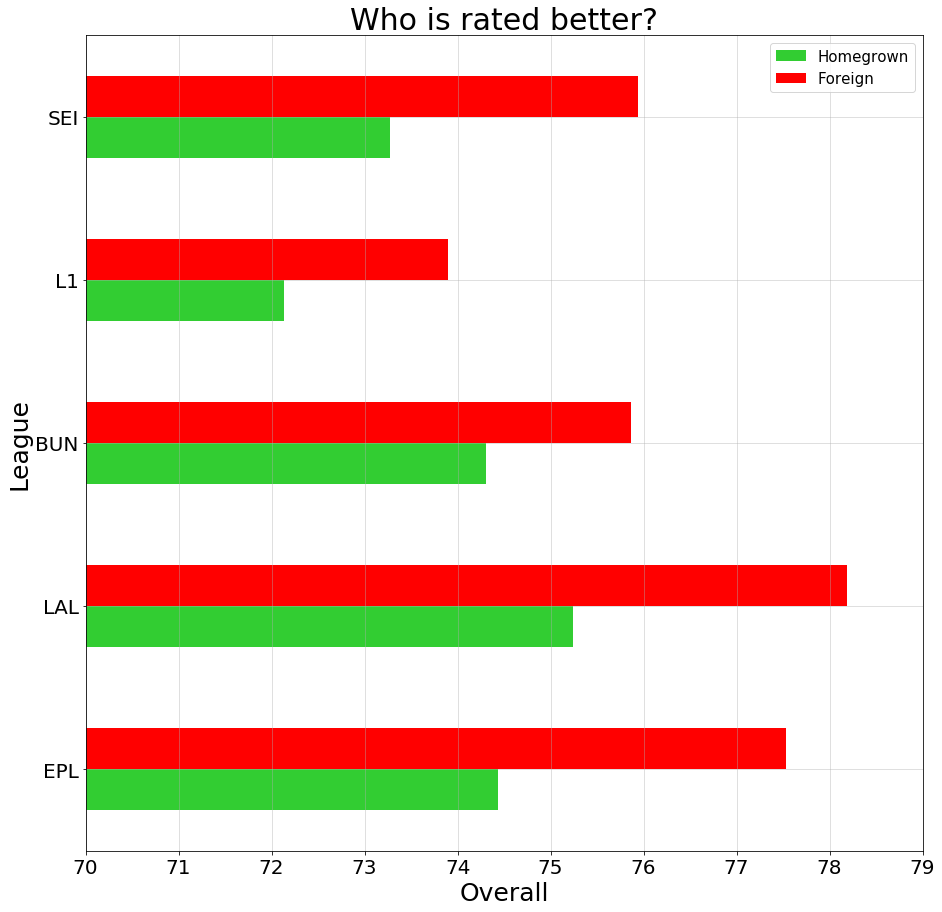

In [39]:
ax = overall[['Homegrown','Foreign']].plot(kind='barh', figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=25)
ax.set_title("Who is rated better?",fontsize= 30)
ax.set_xlabel("Overall", fontsize=25)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
ax.set_xlim(70,79)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()

### Home/Abroad

In [40]:
ENGH_overall = Home_ENG['overall'].mean()
ENGA_overall = Abroad_ENG['overall'].mean()
EPL_overall = pd.DataFrame([ENGH_overall,ENGA_overall])

SPAH_overall = Home_SPA['overall'].mean()
SPAF_overall = Abroad_SPA['overall'].mean()
SPA_overall = pd.DataFrame([SPAH_overall,SPAF_overall])

GERH_overall = Home_GER['overall'].mean()
GERF_overall = Abroad_GER['overall'].mean()
GER_overall = pd.DataFrame([GERH_overall,GERF_overall])

FRAH_overall = Home_FRA['overall'].mean()
FRAF_overall = Abroad_FRA['overall'].mean()
FRA_overall = pd.DataFrame([FRAH_overall,FRAF_overall])

ITAH_overall = Home_ITA['overall'].mean()
ITAF_overall = Abroad_ITA['overall'].mean()
ITA_overall = pd.DataFrame([ITAH_overall,ITAF_overall])

overall = pd.DataFrame(columns = ["League","Home", "Abroad"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Home',ENGH_overall)
overall.set_value(0,'Abroad',ENGA_overall)
overall.set_value(1,'League',"SPA")
overall.set_value(1,'Home',SPAH_overall )
overall.set_value(1,'Abroad',SPAF_overall)
overall.set_value(2,'League',"GER")
overall.set_value(2,'Home',GERH_overall)
overall.set_value(2,'Abroad',GERF_overall)
overall.set_value(3,'League',"FRA")
overall.set_value(3,'Home',FRAH_overall)
overall.set_value(3,'Abroad',FRAF_overall)
overall.set_value(4,'League',"ITA")
overall.set_value(4,'Home',ITAH_overall)
overall.set_value(4,'Abroad',ITAF_overall)

,League,Home,Abroad
0,EPL,71.4664,66
1,SPA,73.2199,78.575
2,GER,71.9288,79.5238
3,FRA,70.7026,78.2933
4,ITA,71.4371,78.4737


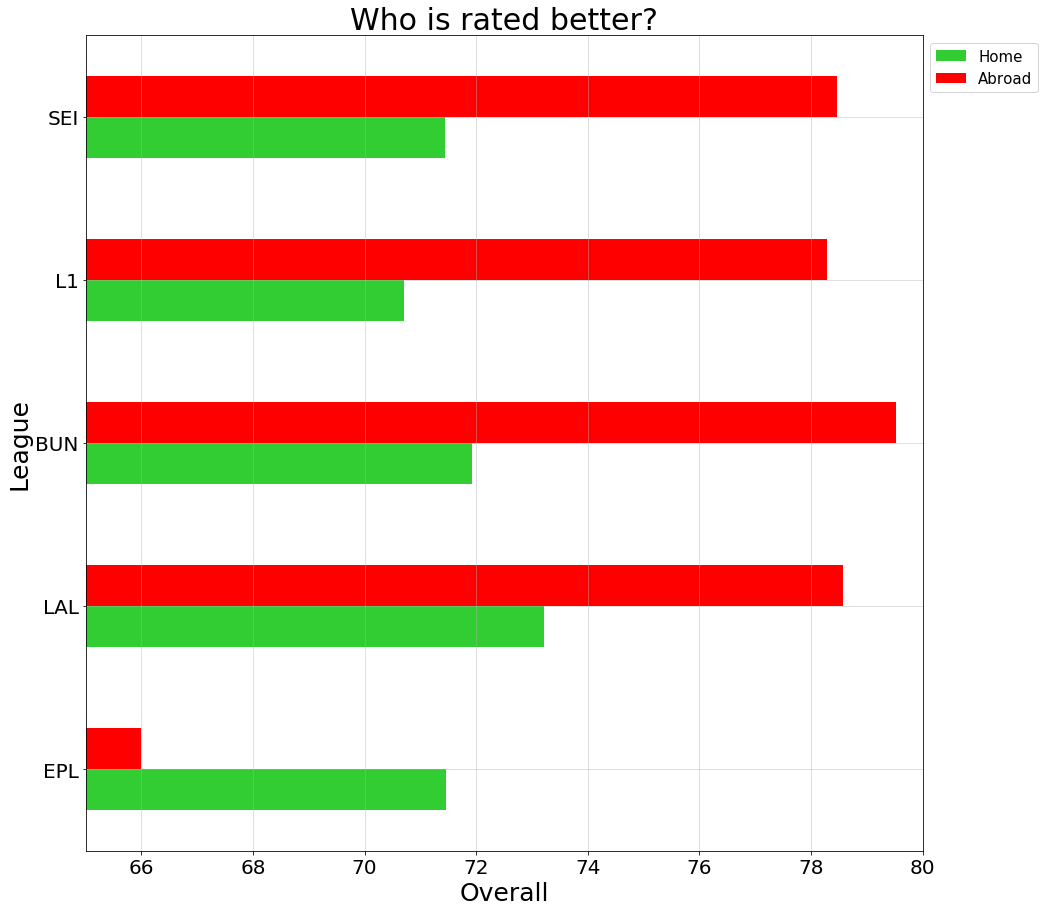

In [41]:
ax = overall[['Home','Abroad']].plot(kind='barh', figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=25)
ax.set_title("Who is rated better?",fontsize= 30)
ax.set_xlabel("Overall", fontsize=25)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
ax.set_xlim(65,80)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()

In [42]:
ENGH_Form = Home_ENG['Average Form'].mean()
ENGA_Form = Abroad_ENG['Average Form'].mean()
EPL_Form = pd.DataFrame([ENGH_Form,ENGA_Form])

SPAH_Form = Home_SPA['Average Form'].mean()
SPAF_Form = Abroad_SPA['Average Form'].mean()
SPA_Form = pd.DataFrame([SPAH_Form,SPAF_Form])

GERH_Form = Home_GER['Average Form'].mean()
GERF_Form = Abroad_GER['Average Form'].mean()
GER_Form = pd.DataFrame([GERH_Form,GERF_Form])

FRAH_Form = Home_FRA['Average Form'].mean()
FRAF_Form = Abroad_FRA['Average Form'].mean()
FRA_Form = pd.DataFrame([FRAH_Form,FRAF_Form])

ITAH_Form = Home_ITA['Average Form'].mean()
ITAF_Form = Abroad_ITA['Average Form'].mean()
ITA_Form = pd.DataFrame([ITAH_Form,ITAF_Form])

Form = pd.DataFrame(columns = ["League","Home", "Abroad"])
Form.set_value(0,'League',"EPL")
Form.set_value(0,'Home',ENGH_Form)
Form.set_value(0,'Abroad',ENGA_Form)
Form.set_value(1,'League',"SPA")
Form.set_value(1,'Home',SPAH_Form )
Form.set_value(1,'Abroad',SPAF_Form)
Form.set_value(2,'League',"GER")
Form.set_value(2,'Home',GERH_Form)
Form.set_value(2,'Abroad',GERF_Form)
Form.set_value(3,'League',"FRA")
Form.set_value(3,'Home',FRAH_Form)
Form.set_value(3,'Abroad',FRAF_Form)
Form.set_value(4,'League',"ITA")
Form.set_value(4,'Home',ITAH_Form)
Form.set_value(4,'Abroad',ITAF_Form)

,League,Home,Abroad
0,EPL,2.01109,1.42857
1,SPA,1.94307,2.55114
2,GER,2.02563,2.56976
3,FRA,2.07766,2.66799
4,ITA,1.89065,2.54697


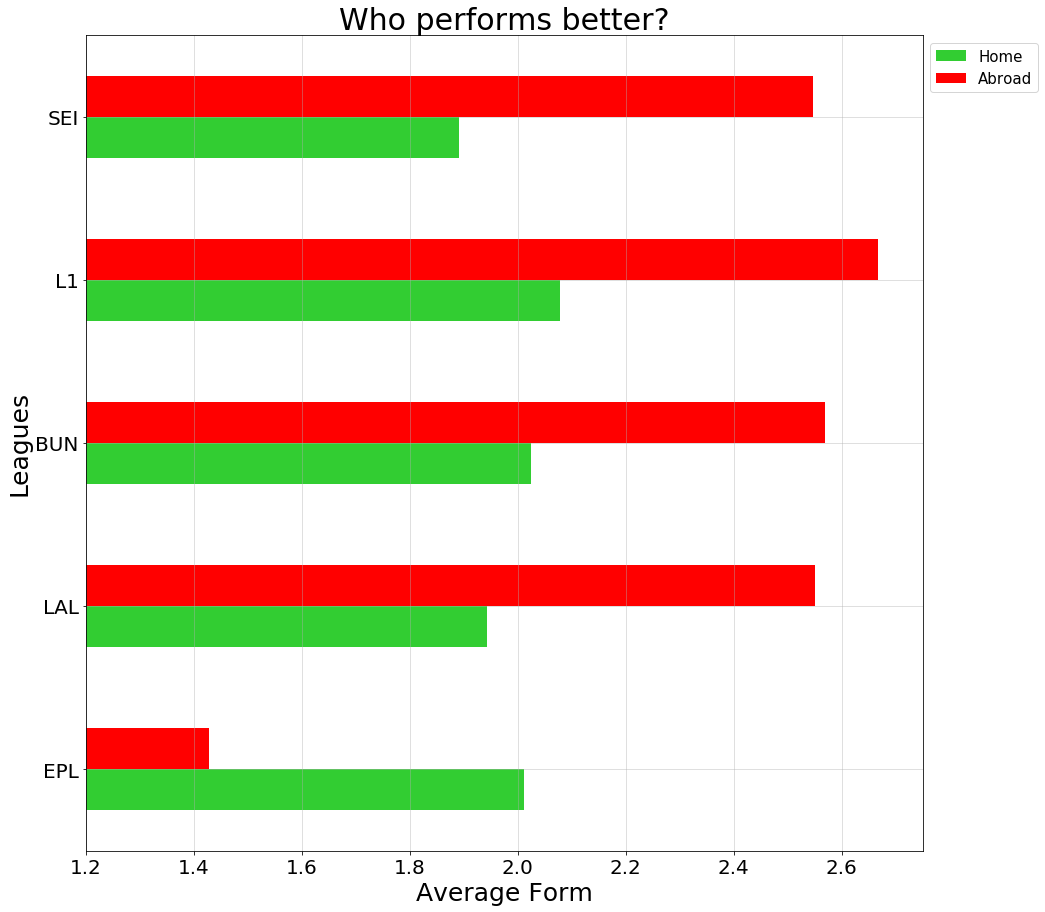

In [43]:
ax = Form[['Home','Abroad']].plot(kind='barh',figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("Leagues", fontsize=25)
ax.set_xlabel("Average Form", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlim(1.2,2.75)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()
plt.savefig('../../data/analysis/League Form.png')

In [44]:
Homegrown = pd.concat([Homegrown_EPL,Homegrown_BUN,Homegrown_LAL,Homegrown_L1,Homegrown_SEI])
Foreign = pd.concat([Foreign_EPL,Foreign_BUN,Foreign_LAL,Foreign_L1,Foreign_SEI])
Homegrown = Homegrown[Homegrown['Overall Apps'] >= 10]
Foreign = Foreign[Foreign['Overall Apps'] >= 10]

In [45]:
Homegrown_goalkeepers = Homegrown[Homegrown['Position']=='Goalkeeper' ]
Homegrown_defenders = Homegrown[Homegrown['Position']=='Defender']
Homegrown_midfielders = Homegrown[Homegrown['Position']=='Midfielder']
Homegrown_forwards = Homegrown[Homegrown['Position']=='Forward']

Foreign_goalkeepers = Foreign[Foreign['Position']=='Goalkeeper' ]
Foreign_defenders = Foreign[Foreign['Position']=='Defender']
Foreign_midfielders = Foreign[Foreign['Position']=='Midfielder']
Foreign_forwards = Foreign[Foreign['Position']=='Forward']

In [46]:
Homegrown_goalkeepers = Homegrown_goalkeepers.sort_values('Average Form',ascending=False)
Homegrown_goalkeeper = Homegrown_goalkeepers.head(1)

Homegrown_defenders = Homegrown_defenders.sort_values('Average Form',ascending=False)
Homegrown_defender = Homegrown_defenders.head(4)


Homegrown_midfielders = Homegrown_midfielders.sort_values('Average Form',ascending=False)
Homegrown_midfielder = Homegrown_midfielders.head(4)


Homegrown_forwards = Homegrown_forwards.sort_values('Average Form',ascending=False)
Homegrown_forward = Homegrown_forwards.head(2)

Homegrown_XI= pd.concat([Homegrown_goalkeeper,Homegrown_defender,Homegrown_midfielder,Homegrown_forward])



Foreign_goalkeepers = Foreign_goalkeepers.sort_values('Average Form',ascending=False)
Foreign_goalkeeper = Foreign_goalkeepers.head(1)

Foreign_defenders = Foreign_defenders.sort_values('Average Form',ascending=False)
Foreign_defender = Foreign_defenders.head(4)


Foreign_midfielders = Foreign_midfielders.sort_values('Average Form',ascending=False)
Foreign_midfielder = Foreign_midfielders.head(4)


Foreign_forwards = Foreign_forwards.sort_values('Average Form',ascending=False)
Foreign_forward = Foreign_forwards.head(2)

Foreign_XI= pd.concat([Foreign_goalkeeper,Foreign_defender,Foreign_midfielder,Foreign_forward])

In [47]:
Homegrown_XI['photo'] = Homegrown_XI['photo'].replace('/18/','/1x/18/', regex=True)
Homegrown_XI = Homegrown_XI.reset_index()
Homegrown_XI = Homegrown_XI.drop('index',1)
Homegrown_XI['Average Form'] = Homegrown_XI['Average Form'].round(2)
Homegrown_XI['Average Form'] = Homegrown_XI['Average Form'].astype(str)
Squad_Rating = Homegrown_XI['overall'].sum()/11
Squad_Rating_H = str(Squad_Rating)
Homegrown_XI['overall'] = Homegrown_XI['overall'].astype(str)

Foreign_XI['photo'] = Foreign_XI['photo'].replace('/18/','/1x/18/', regex=True)
Foreign_XI = Foreign_XI.reset_index()
Foreign_XI = Foreign_XI.drop('index',1)
Foreign_XI['Average Form'] = Foreign_XI['Average Form'].round(2)
Foreign_XI['Average Form'] = Foreign_XI['Average Form'].astype(str)
Squad_Rating = Foreign_XI['overall'].sum()/11
Squad_Rating_F = str(Squad_Rating)
Foreign_XI['overall'] = Foreign_XI['overall'].astype(str)

In [48]:
JoinedHomegrownImages = Homegrown_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedHomegrownImages[0])
DF1 = mpimg.imread(JoinedHomegrownImages[1])
DF2 = mpimg.imread(JoinedHomegrownImages[2])
DF3 = mpimg.imread(JoinedHomegrownImages[3])
DF4 = mpimg.imread(JoinedHomegrownImages[4])
MD1 = mpimg.imread(JoinedHomegrownImages[5])
MD2 = mpimg.imread(JoinedHomegrownImages[6])
MD3 = mpimg.imread(JoinedHomegrownImages[7])
MD4 = mpimg.imread(JoinedHomegrownImages[8])
FW1 = mpimg.imread(JoinedHomegrownImages[9])
FW2 = mpimg.imread(JoinedHomegrownImages[10])

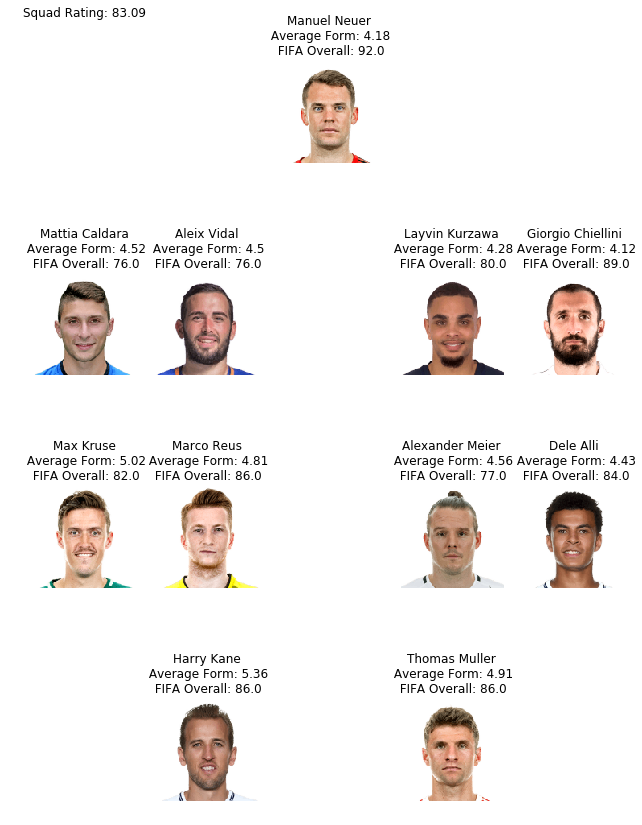

In [49]:
mpl.rcParams['font.size'] = 10
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_H[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Homegrown_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Homegrown_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Homegrown_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Homegrown_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Homegrown_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Homegrown_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Homegrown_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Homegrown_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Homegrown_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Homegrown_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Homegrown_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Homegrown_XI.png')

In [50]:
JoinedForeignImages = Foreign_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedForeignImages[0])
DF1 = mpimg.imread(JoinedForeignImages[1])
DF2 = mpimg.imread(JoinedForeignImages[2])
DF3 = mpimg.imread(JoinedForeignImages[3])
DF4 = mpimg.imread(JoinedForeignImages[4])
MD1 = mpimg.imread(JoinedForeignImages[5])
MD2 = mpimg.imread(JoinedForeignImages[6])
MD3 = mpimg.imread(JoinedForeignImages[7])
MD4 = mpimg.imread(JoinedForeignImages[8])
FW1 = mpimg.imread(JoinedForeignImages[9])
FW2 = mpimg.imread(JoinedForeignImages[10])

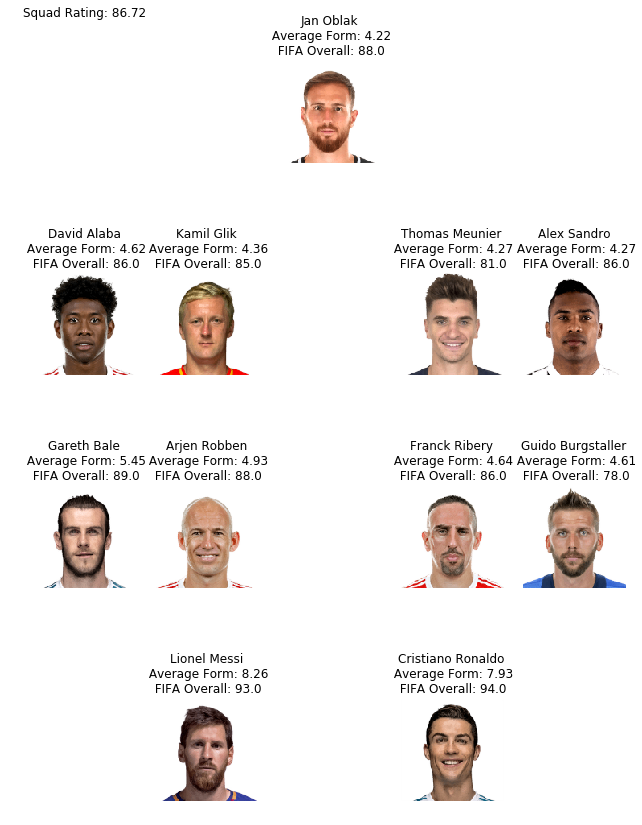

In [51]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_F[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Foreign_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Foreign_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Foreign_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Foreign_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Foreign_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Foreign_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Foreign_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Foreign_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Foreign_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Foreign_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Foreign_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Foreign_XI.png')

### Home XI is the same as Homegrown XI

In [52]:
Abroad = pd.concat([Abroad_ENG,Abroad_GER,Abroad_SPA,Abroad_FRA,Abroad_ITA])
Abroad = Abroad[Abroad['Overall Apps'] >= 10]

In [53]:
Abroad_goalkeepers = Abroad[Abroad['Position']=='Goalkeeper' ]
Abroad_defenders = Abroad[Abroad['Position']=='Defender']
Abroad_midfielders = Abroad[Abroad['Position']=='Midfielder']
Abroad_forwards = Abroad[Abroad['Position']=='Forward']

In [54]:

Abroad_goalkeepers = Abroad_goalkeepers.sort_values('Average Form',ascending=False)
Abroad_goalkeeper = Abroad_goalkeepers.head(1)

Abroad_defenders = Abroad_defenders.sort_values('Average Form',ascending=False)
Abroad_defender = Abroad_defenders.head(4)


Abroad_midfielders = Abroad_midfielders.sort_values('Average Form',ascending=False)
Abroad_midfielder = Abroad_midfielders.head(4)


Abroad_forwards = Abroad_forwards.sort_values('Average Form',ascending=False)
Abroad_forward = Abroad_forwards.head(2)

Abroad_XI= pd.concat([Abroad_goalkeeper,Abroad_defender,Abroad_midfielder,Abroad_forward])

In [55]:
Abroad_XI['photo'] = Abroad_XI['photo'].replace('/18/','/1x/18/', regex=True)
Abroad_XI = Abroad_XI.reset_index()
Abroad_XI = Abroad_XI.drop('index',1)
Abroad_XI['Average Form'] = Abroad_XI['Average Form'].round(2)
Abroad_XI['Average Form'] = Abroad_XI['Average Form'].astype(str)
Squad_Rating = Abroad_XI['overall'].sum()/11
Squad_Rating_F = str(Squad_Rating)
Abroad_XI['overall'] = Abroad_XI['overall'].astype(str)

In [56]:
JoinedAbroadImages = Abroad_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedAbroadImages[0])
DF1 = mpimg.imread(JoinedAbroadImages[1])
DF2 = mpimg.imread(JoinedAbroadImages[2])
DF3 = mpimg.imread(JoinedAbroadImages[3])
DF4 = mpimg.imread(JoinedAbroadImages[4])
MD1 = mpimg.imread(JoinedAbroadImages[5])
MD2 = mpimg.imread(JoinedAbroadImages[6])
MD3 = mpimg.imread(JoinedAbroadImages[7])
MD4 = mpimg.imread(JoinedAbroadImages[8])
FW1 = mpimg.imread(JoinedAbroadImages[9])
FW2 = mpimg.imread(JoinedAbroadImages[10])

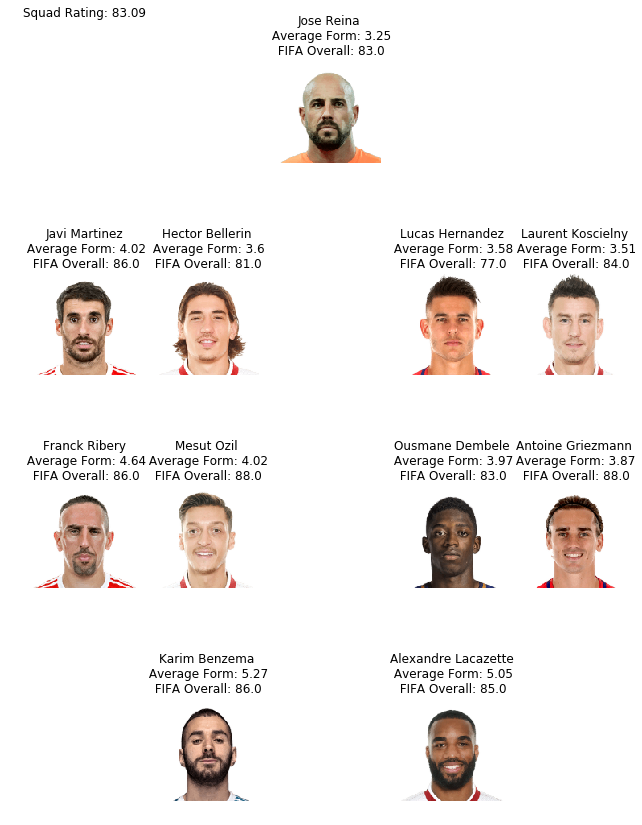

In [57]:
mpl.rcParams['font.size'] = 10
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_H[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Abroad_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Abroad_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Abroad_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Abroad_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Abroad_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Abroad_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Abroad_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Abroad_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Abroad_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Abroad_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Abroad_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Abroad_XI.png')